In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle

sns.set_theme()
sns.set(font_scale = 0.9)

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.1f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

# Import Biological Data

In [2]:
# 'Biological Data' sheet is where most info is
# 'Site Measurement Data' may also be useful

df_gns = pd.read_excel(r'.\raw_data\GNS Efish_2006-2020_For DM App.xlsx', sheet_name='Biological Data')
df_gns.columns = [x.strip().replace(' ', '_').upper() for x in df_gns.columns]

df_mar = pd.read_excel(r'.\raw_data\Margaree Efish_1957-2020_For DM App.xlsx', sheet_name='Biological Data')
df_mar.columns = [x.strip().replace(' ', '_').upper() for x in df_mar.columns]

# numeric columns with non numeric data

In [3]:
[x for x in df_gns['FORK_LENGTH'].unique() if not str(x).replace('.','',1).isnumeric()]

[nan]

In [4]:
df_gns[df_gns['FORK_LENGTH'].isnull()].shape[0]

119

In [5]:
[x for x in df_gns['WEIGHT'].unique() if not str(x).replace('.','',1).isnumeric()]

[nan, '4..14']

In [6]:
df_gns[df_gns['WEIGHT'].isnull()].shape[0], df_gns[df_gns['WEIGHT']=='4..14'].shape[0]

(245, 1)

In [7]:
[x for x in df_mar['FORK_LENGTH'].unique() if not str(x).replace('.','',1).isnumeric()]

[nan,
 '21-25',
 '26-30',
 '31-35',
 '36-40',
 '41-45',
 '46-50',
 ' ',
 '76-80',
 '81-85',
 '86-90',
 '96-100']

In [8]:
(
    df_mar[df_mar.FORK_LENGTH.isnull()].shape[0],
    df_mar[df_mar.FORK_LENGTH.isin([x for x in df_mar['FORK_LENGTH'].dropna().unique() if not str(x).replace('.','',1).isnumeric()])].shape[0]
)
# null, other non-numeric

(9033, 40)

In [9]:
[x for x in df_mar['WEIGHT'].unique() if not str(x).replace('.','',1).isnumeric()]

[nan]

In [10]:
df_mar[df_mar['WEIGHT'].isnull()].shape[0]

19630

# convert numeric to numeric, coercing errors
### NOTE: this step replaces the errors shown above with NA

In [11]:
# convert and coerce errors
df_gns['FORK_LENGTH'] = (pd.to_numeric(df_gns.FORK_LENGTH, errors='coerce') // 1).astype('Int64')
df_gns['WEIGHT'] = pd.to_numeric(df_gns.WEIGHT, errors='coerce')
df_mar['FORK_LENGTH'] = (pd.to_numeric(df_mar.FORK_LENGTH, errors='coerce') // 1).astype('Int64')
df_mar['WEIGHT'] = pd.to_numeric(df_mar.WEIGHT, errors='coerce')

# create weight bins for plotting

In [12]:
# one huge boi
df_mar[df_mar.WEIGHT>10000]

,ID,YEAR,SITE,CGNDB,SWEEP_NUMBER,SPECIES_ITIS_CODE,SPECIES,ORIGIN,FISH_STATUS,FORK_LENGTH,FORK_LENGTH_INTERVAL_WIDTH,TOTAL_LENGTH,WEIGHT,CATCH_FREQUENCY,FISH_SIZE,RIVER_AGE,AGE_TYPE,SEX,MATURITY,SCALE_ID_NUMBER,COMMENTS
12689,12690,1991,96,NaN,1,NaN,1781,W,RS,100,NaN,NaN,11600.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_gns['WT_BIN'] = df_gns['WEIGHT'] // 1
df_gns.loc[df_gns.WT_BIN>100, 'WT_BIN'] = 100
df_mar['WT_BIN'] = df_mar['WEIGHT'] // 1
df_mar.loc[df_mar.WT_BIN>100, 'WT_BIN'] = 100

# describe the data

In [14]:
df_gns.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,12895.0,NaN,NaN,NaN,6448.0,3722.6,1.0,3224.5,6448.0,9671.5,12895.0
YEAR,12859.0,NaN,NaN,NaN,2013.6,4.3,2006.0,2010.0,2014.0,2017.0,2020.0
SITE,12859.0,32.0,4.0,2420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIVER_NAME,12859,16,River Philip,4114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWEEP_NUMBER,12859.0,NaN,NaN,NaN,0.5,0.0,0.5,0.5,0.5,0.5,0.5
SPECIES,12855.0,20.0,1731.0,10597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN,9964,2,W,9962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FISH_STATUS,12859,6,RS,12616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FORK_LENGTH,12776.0,NaN,NaN,NaN,66.2,21.4,13.0,53.0,59.0,75.0,552.0
TOTAL_LENGTH,5.0,NaN,NaN,NaN,333.2,183.3,44.0,325.0,325.0,442.0,530.0


In [15]:
df_mar.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,44472.0,NaN,NaN,NaN,22236.5,12838.1,1.0,11118.8,22236.5,33354.2,44472.0
YEAR,44472.0,NaN,NaN,NaN,1994.7,16.0,1957.0,1986.0,1999.0,2005.0,2020.0
SITE,44472.0,115.0,51.0,5404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGNDB,7941,10,Margaree,2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWEEP_NUMBER,41612.0,11.0,0.5,16974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPECIES_ITIS_CODE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPECIES,44472.0,23.0,1731.0,36774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN,44472,3,W,43370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FISH_STATUS,41124,7,RS,36910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FORK_LENGTH,35399.0,NaN,NaN,NaN,74.7,24.5,11.0,55.0,75.0,91.0,700.0


# What are the differences between the two files?

### missing from gns

In [16]:
[x for x in df_mar.columns if x not in df_gns.columns]

['CGNDB', 'SPECIES_ITIS_CODE', 'FORK_LENGTH_INTERVAL_WIDTH']

In [17]:
df_mar.CGNDB.value_counts(dropna=False)

NaN         36531
Margaree     2727
CAMNO        1011
CBBWL         874
CATHP         668
CAWKZ         498
CBJVR         470
CACZB         443
CANHO         428
CARKU         427
CBPVG         395
Name: CGNDB, dtype: int64

In [18]:
# this is not a useful column
df_mar.SPECIES_ITIS_CODE.value_counts(dropna=False)

NaN    44472
Name: SPECIES_ITIS_CODE, dtype: int64

In [19]:
# this incomplete and redundant
df_mar.FORK_LENGTH_INTERVAL_WIDTH.value_counts(dropna=False).head(10)

NaN        40835
1           3521
81-85         11
96-100        10
86-90          9
71-75          8
91-95          8
76-80          8
101-105        8
106-110        7
Name: FORK_LENGTH_INTERVAL_WIDTH, dtype: int64

Null Data: 9073
Non-Null Data: 35399


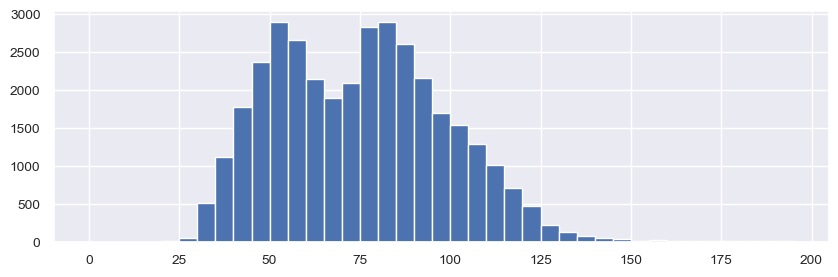

In [20]:
# way more information in fork_length
print('Null Data:', df_mar.FORK_LENGTH.isnull().sum())
print('Non-Null Data:', df_mar.FORK_LENGTH.notnull().sum())
df_mar.FORK_LENGTH.hist(bins=[x*5 for x in range(40)], figsize=(10,3));

### missing from mar

In [21]:
[x for x in df_gns.columns if x not in df_mar.columns]

['RIVER_NAME']

In [22]:
df_gns.RIVER_NAME.value_counts(dropna=False)

River Philip              4114
West River Antigonish     3515
East River Pictou         2872
West River Pictou          562
Mabou                      462
Wallace                    201
Barney River               169
Wallace River              158
River John                 157
Wallace River              154
Barneys River              126
Barneys                    125
Barney's River             113
Mabou River                 83
NaN                         36
North East Mabou            33
River John East Branch      15
Name: RIVER_NAME, dtype: int64

# Descriptive statistics

### NULL

In [23]:
(df_mar.isnull().sum() / df_mar.shape[0]).sort_values(ascending=False)

SPECIES_ITIS_CODE            1.0
MATURITY                     1.0
SCALE_ID_NUMBER              1.0
COMMENTS                     1.0
SEX                          0.9
FORK_LENGTH_INTERVAL_WIDTH   0.9
TOTAL_LENGTH                 0.9
CGNDB                        0.8
AGE_TYPE                     0.7
WEIGHT                       0.4
WT_BIN                       0.4
FORK_LENGTH                  0.2
RIVER_AGE                    0.2
FISH_SIZE                    0.2
FISH_STATUS                  0.1
SWEEP_NUMBER                 0.1
CATCH_FREQUENCY              0.0
YEAR                         0.0
ORIGIN                       0.0
SPECIES                      0.0
SITE                         0.0
ID                           0.0
dtype: float64

In [24]:
(df_gns.isnull().sum() / df_gns.shape[0]).sort_values(ascending=False)

TOTAL_LENGTH      1.0
MATURITY          1.0
SCALE_ID_NUMBER   1.0
COMMENTS          1.0
AGE_TYPE          0.9
SEX               0.9
RIVER_AGE         0.5
ORIGIN            0.2
FISH_SIZE         0.2
WEIGHT            0.0
WT_BIN            0.0
FORK_LENGTH       0.0
SPECIES           0.0
YEAR              0.0
FISH_STATUS       0.0
SWEEP_NUMBER      0.0
RIVER_NAME        0.0
SITE              0.0
CATCH_FREQUENCY   0.0
ID                0.0
dtype: float64

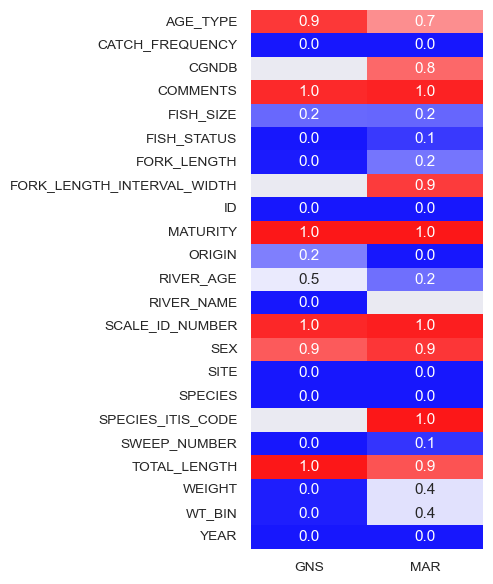

In [25]:
plt.figure(figsize=(3,7))
sns.heatmap(
    pd.concat([
        pd.DataFrame((df_gns.isnull().sum() / df_gns.shape[0]).sort_values(ascending=False), columns=['GNS']),
        pd.DataFrame((df_mar.isnull().sum() / df_mar.shape[0]).sort_values(ascending=False), columns=['MAR'])
    ], axis=1).sort_index(),
    cmap='bwr', annot=True, fmt='.1f', annot_kws={"fontsize":11}, cbar=False, alpha=0.9
)
plt.show()

### Data types

In [26]:
pd.concat([
    pd.DataFrame(df_gns.dtypes, columns=['gns_dtypes']),
    pd.DataFrame(df_gns.nunique(), columns=['gns_unique']),
    pd.DataFrame(df_mar.dtypes, columns=['mar_dtypes']),
    pd.DataFrame(df_mar.nunique(), columns=['mar_unique'])
], axis=1).sort_index()

,gns_dtypes,gns_unique,mar_dtypes,mar_unique
AGE_TYPE,object,2.0,object,3.0
CATCH_FREQUENCY,int64,43.0,float64,180.0
CGNDB,NaN,NaN,object,10.0
COMMENTS,object,48.0,object,72.0
FISH_SIZE,object,4.0,object,6.0
FISH_STATUS,object,6.0,object,7.0
FORK_LENGTH,Int64,170.0,Int64,194.0
FORK_LENGTH_INTERVAL_WIDTH,NaN,NaN,object,27.0
ID,int64,12895.0,int64,44472.0
MATURITY,object,1.0,object,1.0


In [27]:
df_mar.YEAR.min(), df_gns.YEAR.min()

(1957, 2006.0)

In [28]:
def print_unique(dataframe):
    for col in dataframe.columns:
        print()
        print(col)
        if dataframe[col].nunique() > 100:
            print('number of unique values:', dataframe[col].nunique())
        else:
            print(sorted(list(dataframe[col].unique()), key=str))


In [29]:
print_unique(df_gns)


ID
number of unique values: 12895

YEAR
[2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, nan]

SITE
['.', 1, 10, '1A', 2, 3, 4, '4B', 5, 6, '6B', 7, '7B', '7b', 8, '8A', '8B', '8b', 9, 98, 99, 996, 997, 998, 999, '9A', 'A', 'B', 'EF BRI', 'P4', 'SP 1', 'SP1', nan]

RIVER_NAME
['Barney River', "Barney's River", 'Barneys', 'Barneys River', 'East River Pictou', 'Mabou', 'Mabou River', 'North East Mabou', 'River John', 'River John East Branch', 'River Philip', 'Wallace', 'Wallace River', 'Wallace River ', 'West River Antigonish', 'West River Pictou', nan]

SWEEP_NUMBER
[0.5, nan]

SPECIES
[140, 1731, 1741, 1781, 2610, 2621, 2630, 2640, 2641, 2650, 2651, 2680, 3410, 4110, 4220, 4260, 4280, 'DACE', 'Unkn', 'frog', nan]

ORIGIN
['H', 'W', nan]

FISH_STATUS
['L', 'M', 'MS', 'MZ', 'R', 'RS', nan]

FORK_LENGTH
number of unique values: 170

TOTAL_LENGTH
[325.0, 44.0, 442.0, 530.0, nan]

WEIGHT
number of unique values: 1748



In [30]:
print_unique(df_mar)


ID
number of unique values: 44472

YEAR
[1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1975, 1976, 1977, 1978, 1979, 1986, 1987, 1988, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

SITE
number of unique values: 115

CGNDB
['CACZB', 'CAMNO', 'CANHO', 'CARKU', 'CATHP', 'CAWKZ', 'CBBWL', 'CBJVR', 'CBPVG', 'Margaree', nan]

SWEEP_NUMBER
[0, 0.5, 1, '1A', '1B', 2, 3, 4, 5, 6, 7, nan]

SPECIES_ITIS_CODE
[nan]

SPECIES
[140, 151, 1510, 1519, 1731, 1741, 1751, 1760, 1781, 2600, 2610, 2660, 2680, 3410, 4110, 412, 422, 4220, 4250, 4260, 9999, 'tadpole', 'worm']

ORIGIN
['H', 'NC', 'W']

FISH_STATUS
['M', 'M ', 'MS', 'R', 'R ', 'RL', 'RS', nan]

FORK_LENGTH
number of unique values: 194

FORK_LENGTH_INTERVAL_WIDTH
[1, '101-105', '106-110', '111-115', '116-120', '121-125', '1221-125', '126-130', '131-135', '136-140', '146-150', '151-

In [31]:
def types_of_data(series):
    numbers, strings, blanks, n_null = 0, 0, 0, 0
    for item in series:
        if pd.isnull(item):
            n_null += 1
        else:
            try:
                float(item)
                numbers += 1
            except (ValueError):
                strings += 1
                if str(item) == ' ' or str(item) == '':
                    blanks += 1           
    return numbers, strings, blanks, n_null


def print_data_info(dataframe, column):
    print('--------------------------------------------------\nData Info:', column.upper(), '\n')  
    numbers, strings, blanks, n_null = types_of_data(dataframe[column])  
    print('UNIQUE numbers, strings, blanks, null =', types_of_data(dataframe[column].unique()))
    print('number of numeric =', numbers)
    print('number of strings =', strings)
    print('number of blanks =', blanks)
    print('number of null = ', n_null)

    
def print_hist(dataframe, column, max_bins=100, colours=(0,9)):  
    print('\n--------------------------------------------------\nHistogram:', column.upper())   
    plt.figure(figsize=(10, 3))    
    n_unique = dataframe[column].nunique()
    
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins  
    
    # if there are too many bins, rotate the text to make it readable
    if bins > 20:
        xrot = 90
    else:
        xrot = 0
        
    is_categorical = dataframe[column].dtype == 'object'
    if is_categorical:
        plot = dataframe[column].astype(str).sort_values().hist(
            bins=bins, xrot=90, color=sns.color_palette()[colours[1]]
        )
        print('CATEGORICAL')
    else:
        plot = dataframe[column].hist(
            bins=bins, xrot=0, color=sns.color_palette()[colours[0]]
        )
        print('NUMERICAL')
    
    plot.yaxis.tick_right()
    plt.show()
    
    
def print_timeseries(dataframe, column, time_column, colours=(1,6)):
    print('\n------------------------------------------------\nTime Series:', column.upper(), sep='')
    plt.figure(figsize=(10, 3))
    
    try:
        plot = sns.lineplot(
            x = dataframe[time_column], 
            y = dataframe[column].astype(float),  # cast int to float or get ValueErrors with IQR (pi 50)
            errorbar = ('pi', 50),  # IQR
            color = sns.color_palette()[colours[0]]
        )
        print('NUMERICAL')
    except (ValueError, TypeError):  # categorical variables, can't cast to float
        plot = sns.lineplot(
            x = dataframe[time_column], 
            y = dataframe[column].astype(str).sort_values(),
            errorbar = ('pi', 50), 
            color = sns.color_palette()[colours[1]]
        )
        print('CATEGORICAL')  # NOTE: categorical variables treated as ordinal to make plotting possible, averages don't have meaning
        
    # plot.set_xlim(1957, 2022)  # show entire dataset time period for all plots
    plot.yaxis.tick_right()  # so all of the graphs align with eachother, regarless of text length
    plt.show()
    
    
def do_EDA_stuff(dataframe, column, date_column='YEAR'):
    print_data_info(dataframe, column)
    print_hist(dataframe, column)
    print_timeseries(dataframe, column, date_column)

# Biological EDA and Comparison


GNS
--------------------------------------------------
Data Info: ID 

UNIQUE numbers, strings, blanks, null = (12895, 0, 0, 0)
number of numeric = 12895
number of strings = 0
number of blanks = 0
number of null =  0

MARGAREE
--------------------------------------------------
Data Info: ID 

UNIQUE numbers, strings, blanks, null = (44472, 0, 0, 0)
number of numeric = 44472
number of strings = 0
number of blanks = 0
number of null =  0

GNS
--------------------------------------------------
Data Info: YEAR 

UNIQUE numbers, strings, blanks, null = (15, 0, 0, 1)
number of numeric = 12859
number of strings = 0
number of blanks = 0
number of null =  36

MARGAREE
--------------------------------------------------
Data Info: YEAR 

UNIQUE numbers, strings, blanks, null = (51, 0, 0, 0)
number of numeric = 44472
number of strings = 0
number of blanks = 0
number of null =  0

GNS
--------------------------------------------------
Data Info: WEIGHT 

UNIQUE numbers, strings, blanks, null = (17

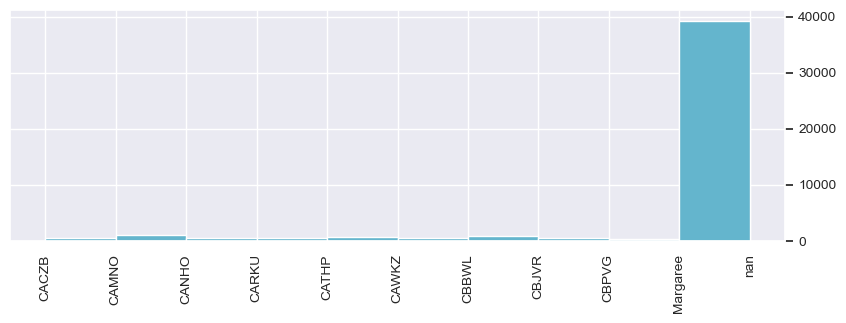


------------------------------------------------
Time Series:CGNDB
CATEGORICAL


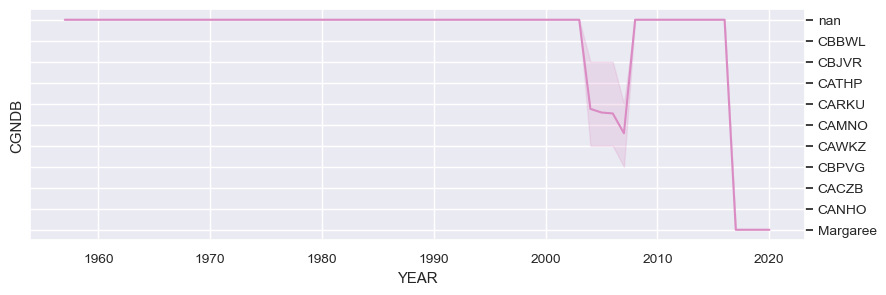


GNS
--------------------------------------------------
Data Info: SPECIES 

UNIQUE numbers, strings, blanks, null = (17, 3, 0, 1)
number of numeric = 12852
number of strings = 3
number of blanks = 0
number of null =  40

--------------------------------------------------
Histogram: SPECIES
CATEGORICAL


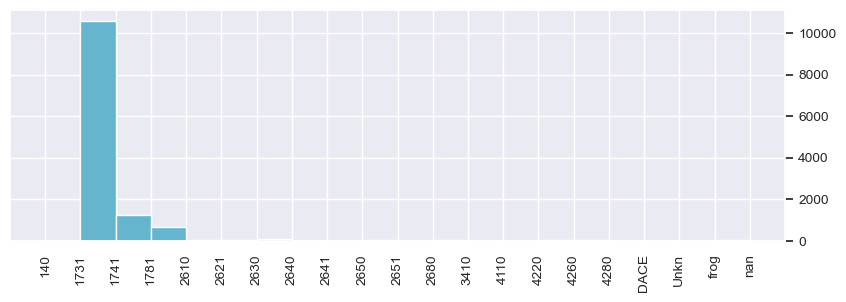


------------------------------------------------
Time Series:SPECIES
CATEGORICAL


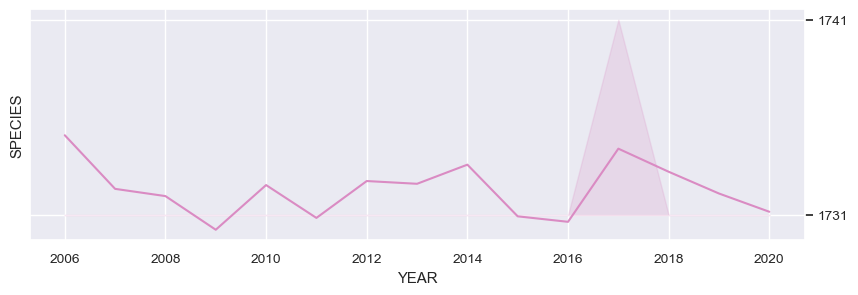


MARGAREE
--------------------------------------------------
Data Info: SPECIES 

UNIQUE numbers, strings, blanks, null = (21, 2, 0, 0)
number of numeric = 44470
number of strings = 2
number of blanks = 0
number of null =  0

--------------------------------------------------
Histogram: SPECIES
CATEGORICAL


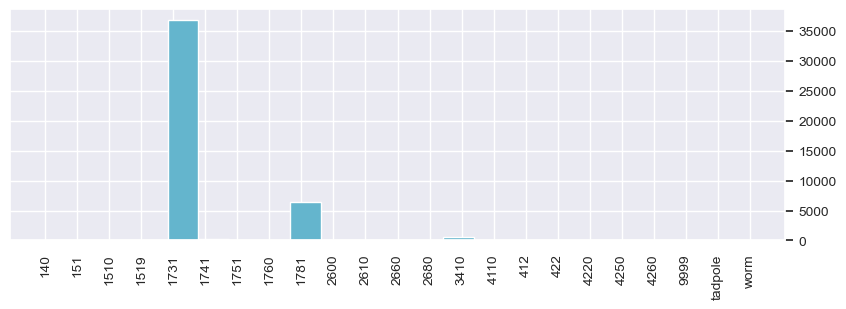


------------------------------------------------
Time Series:SPECIES
CATEGORICAL


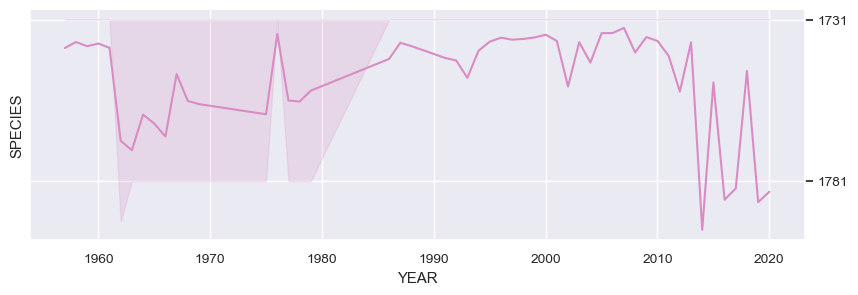


GNS
--------------------------------------------------
Data Info: RIVER_AGE 

UNIQUE numbers, strings, blanks, null = (3, 0, 0, 1)
number of numeric = 6967
number of strings = 0
number of blanks = 0
number of null =  5928

--------------------------------------------------
Histogram: RIVER_AGE
NUMERICAL


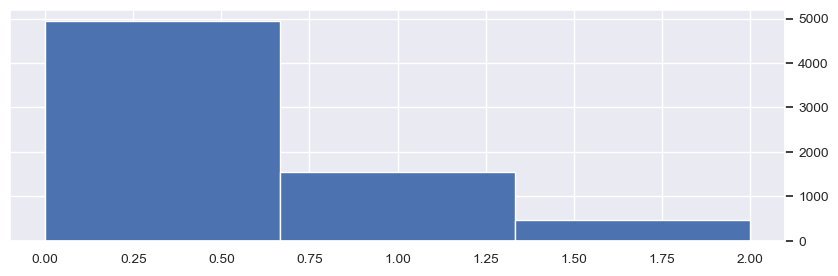


------------------------------------------------
Time Series:RIVER_AGE
NUMERICAL


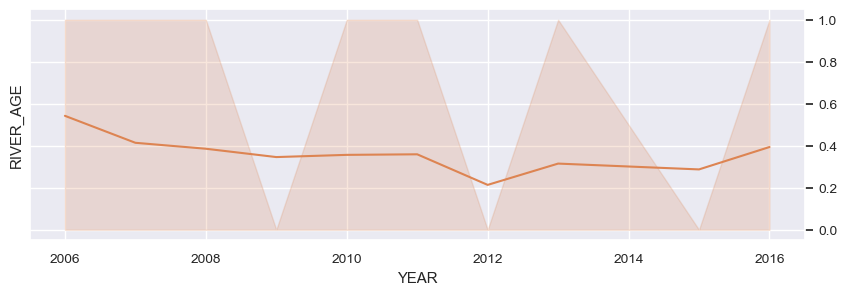


MARGAREE
--------------------------------------------------
Data Info: RIVER_AGE 

UNIQUE numbers, strings, blanks, null = (5, 0, 0, 1)
number of numeric = 35813
number of strings = 0
number of blanks = 0
number of null =  8659

--------------------------------------------------
Histogram: RIVER_AGE
NUMERICAL


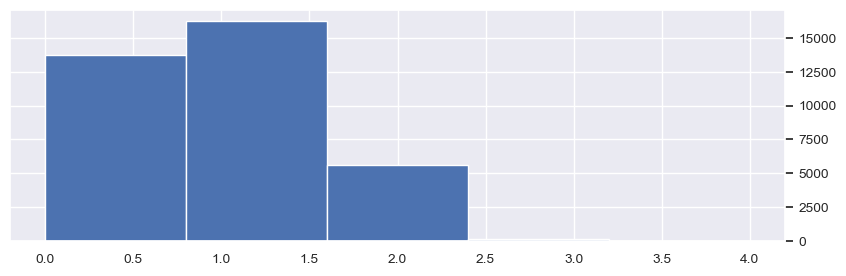


------------------------------------------------
Time Series:RIVER_AGE
NUMERICAL


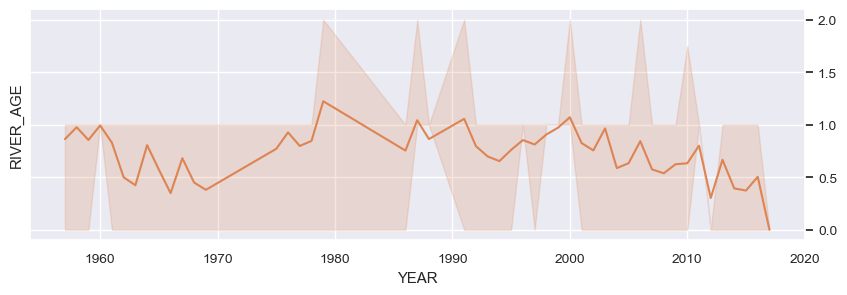


GNS
--------------------------------------------------
Data Info: SEX 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 1882
number of blanks = 0
number of null =  11013

--------------------------------------------------
Histogram: SEX
CATEGORICAL


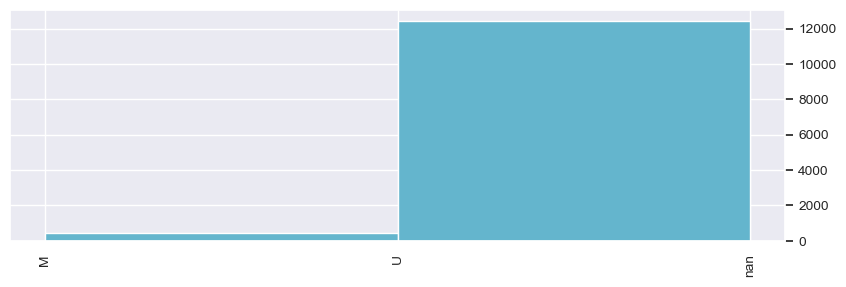


------------------------------------------------
Time Series:SEX
CATEGORICAL


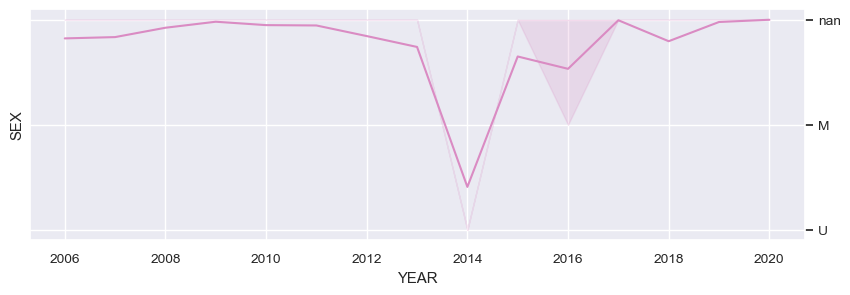


MARGAREE
--------------------------------------------------
Data Info: SEX 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 3088
number of blanks = 0
number of null =  41384

--------------------------------------------------
Histogram: SEX
CATEGORICAL


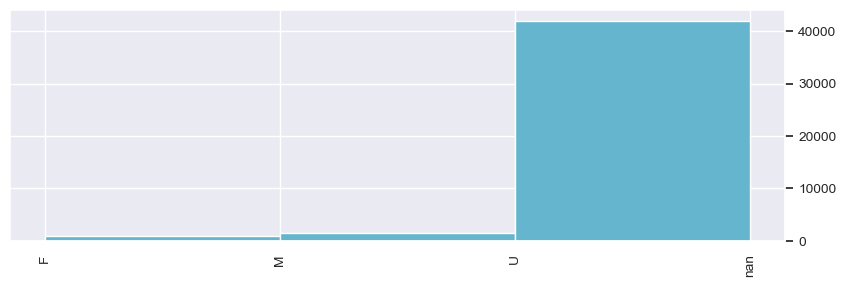


------------------------------------------------
Time Series:SEX
CATEGORICAL


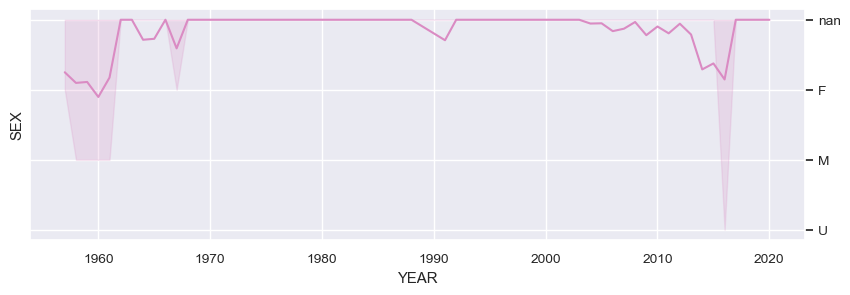


GNS
--------------------------------------------------
Data Info: SWEEP_NUMBER 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 1)
number of numeric = 12859
number of strings = 0
number of blanks = 0
number of null =  36

--------------------------------------------------
Histogram: SWEEP_NUMBER
NUMERICAL


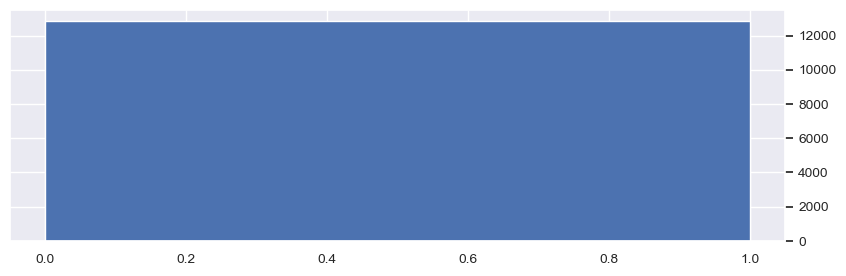


------------------------------------------------
Time Series:SWEEP_NUMBER
NUMERICAL


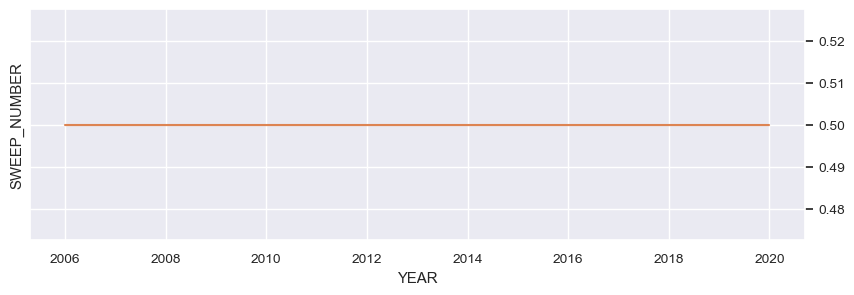


MARGAREE
--------------------------------------------------
Data Info: SWEEP_NUMBER 

UNIQUE numbers, strings, blanks, null = (9, 2, 0, 1)
number of numeric = 40583
number of strings = 1029
number of blanks = 0
number of null =  2860

--------------------------------------------------
Histogram: SWEEP_NUMBER
CATEGORICAL


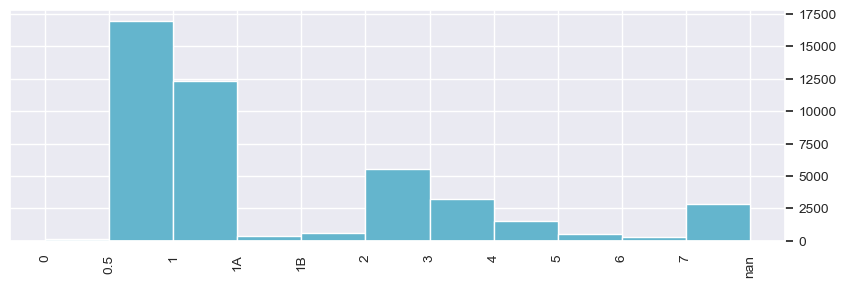


------------------------------------------------
Time Series:SWEEP_NUMBER
CATEGORICAL


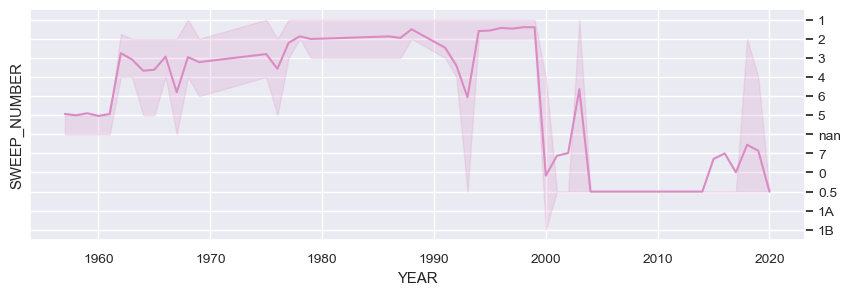


GNS
--------------------------------------------------
Data Info: WT_BIN 

UNIQUE numbers, strings, blanks, null = (66, 0, 0, 1)
number of numeric = 12649
number of strings = 0
number of blanks = 0
number of null =  246

--------------------------------------------------
Histogram: WT_BIN
NUMERICAL


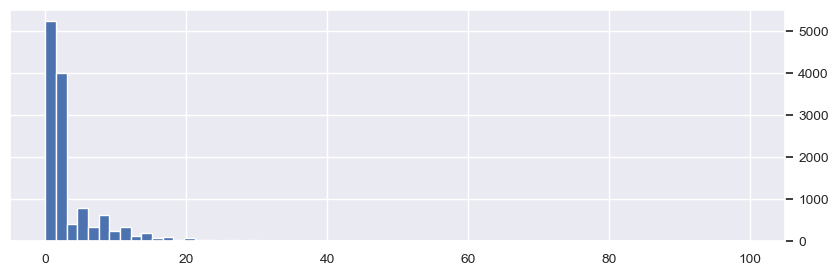


------------------------------------------------
Time Series:WT_BIN
NUMERICAL


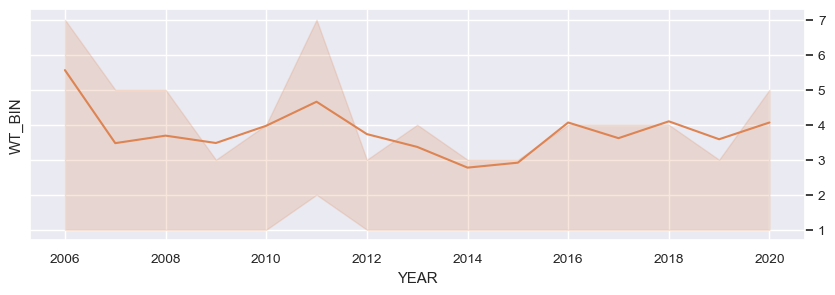


MARGAREE
--------------------------------------------------
Data Info: WT_BIN 

UNIQUE numbers, strings, blanks, null = (74, 0, 0, 1)
number of numeric = 24842
number of strings = 0
number of blanks = 0
number of null =  19630

--------------------------------------------------
Histogram: WT_BIN
NUMERICAL


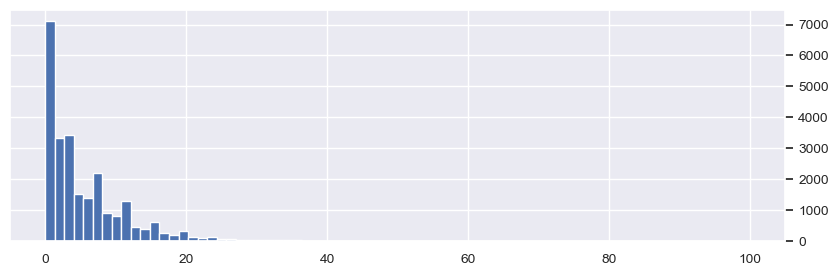


------------------------------------------------
Time Series:WT_BIN
NUMERICAL


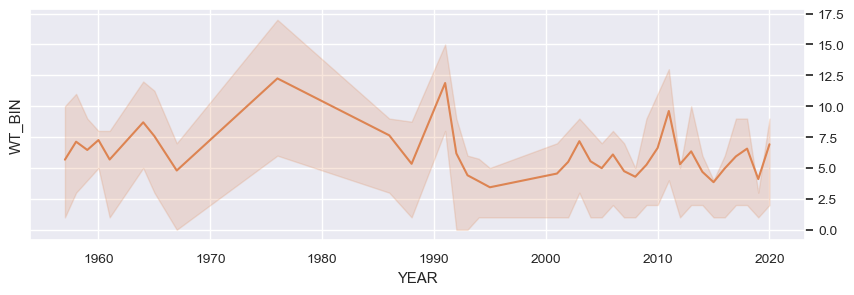


GNS
--------------------------------------------------
Data Info: FORK_LENGTH 

UNIQUE numbers, strings, blanks, null = (170, 0, 0, 1)
number of numeric = 12776
number of strings = 0
number of blanks = 0
number of null =  119

--------------------------------------------------
Histogram: FORK_LENGTH
NUMERICAL


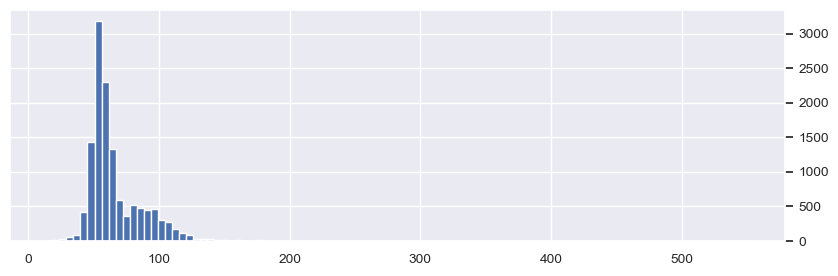


------------------------------------------------
Time Series:FORK_LENGTH
NUMERICAL


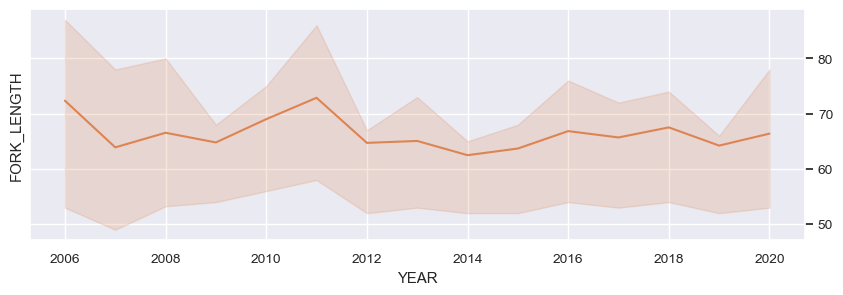


MARGAREE
--------------------------------------------------
Data Info: FORK_LENGTH 

UNIQUE numbers, strings, blanks, null = (194, 0, 0, 1)
number of numeric = 35399
number of strings = 0
number of blanks = 0
number of null =  9073

--------------------------------------------------
Histogram: FORK_LENGTH
NUMERICAL


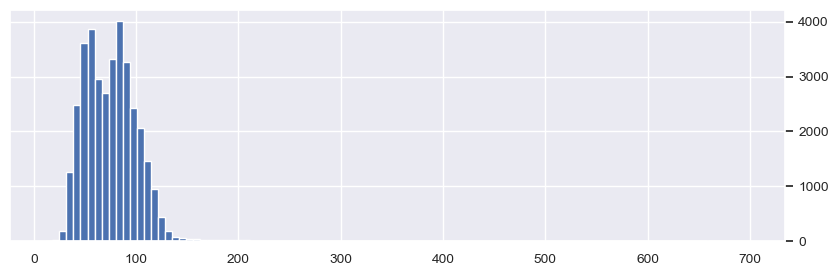


------------------------------------------------
Time Series:FORK_LENGTH
NUMERICAL


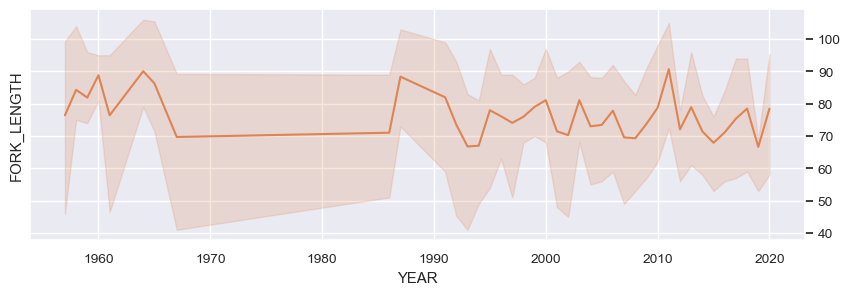


GNS
--------------------------------------------------
Data Info: ORIGIN 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 9964
number of blanks = 0
number of null =  2931

--------------------------------------------------
Histogram: ORIGIN
CATEGORICAL


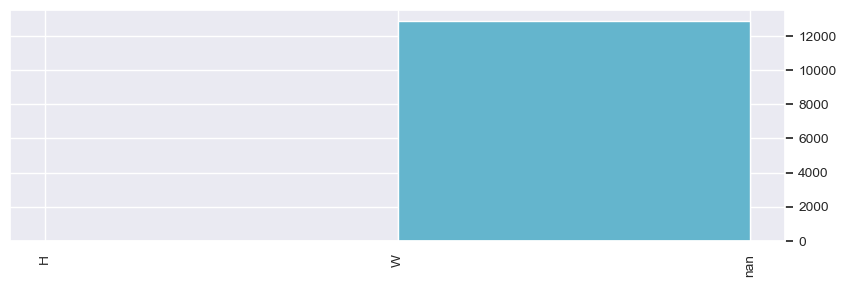


------------------------------------------------
Time Series:ORIGIN
CATEGORICAL


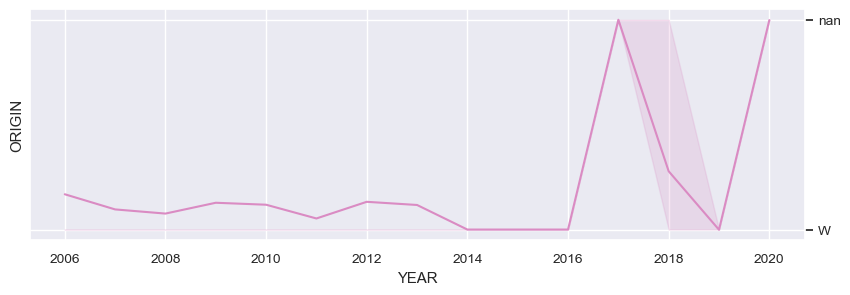


MARGAREE
--------------------------------------------------
Data Info: ORIGIN 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 0)
number of numeric = 0
number of strings = 44472
number of blanks = 0
number of null =  0

--------------------------------------------------
Histogram: ORIGIN
CATEGORICAL


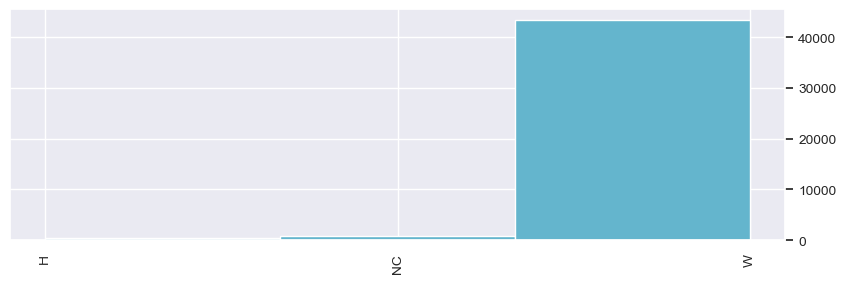


------------------------------------------------
Time Series:ORIGIN
CATEGORICAL


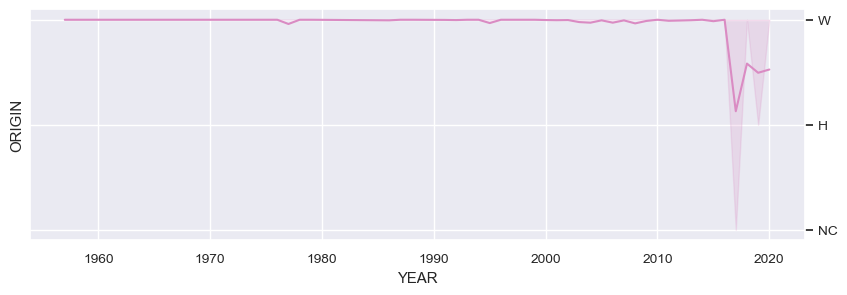


GNS
--------------------------------------------------
Data Info: CATCH_FREQUENCY 

UNIQUE numbers, strings, blanks, null = (43, 0, 0, 0)
number of numeric = 12895
number of strings = 0
number of blanks = 0
number of null =  0

--------------------------------------------------
Histogram: CATCH_FREQUENCY
NUMERICAL


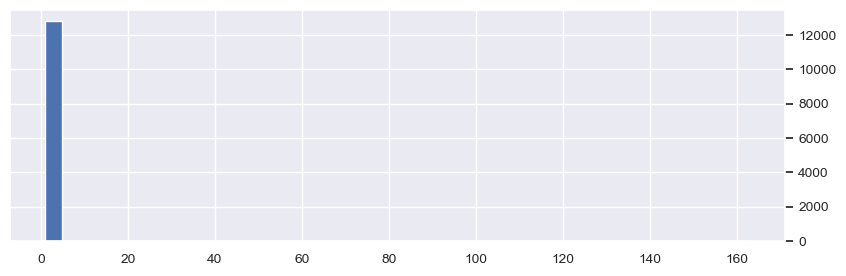


------------------------------------------------
Time Series:CATCH_FREQUENCY
NUMERICAL


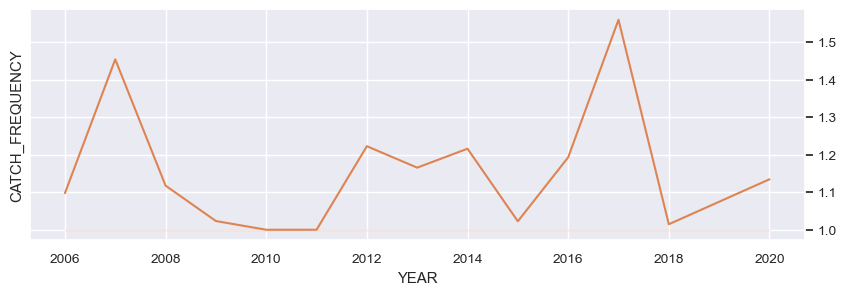


MARGAREE
--------------------------------------------------
Data Info: CATCH_FREQUENCY 

UNIQUE numbers, strings, blanks, null = (180, 0, 0, 1)
number of numeric = 44465
number of strings = 0
number of blanks = 0
number of null =  7

--------------------------------------------------
Histogram: CATCH_FREQUENCY
NUMERICAL


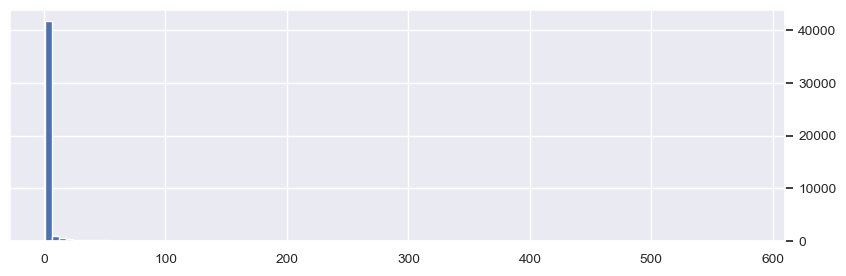


------------------------------------------------
Time Series:CATCH_FREQUENCY
NUMERICAL


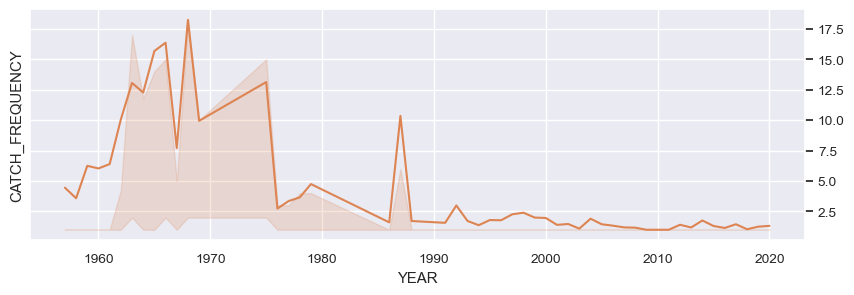


GNS
--------------------------------------------------
Data Info: AGE_TYPE 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 918
number of blanks = 0
number of null =  11977

--------------------------------------------------
Histogram: AGE_TYPE
CATEGORICAL


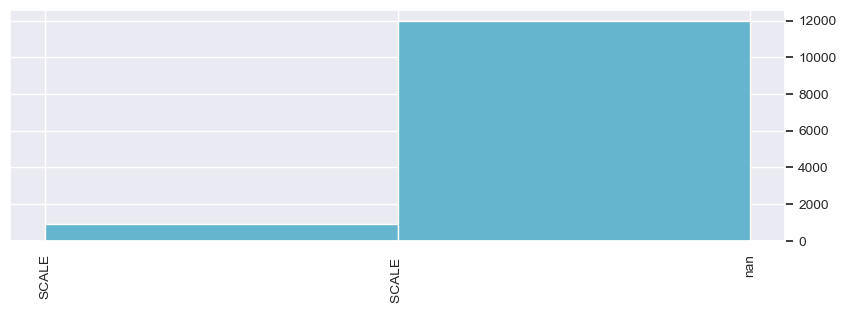


------------------------------------------------
Time Series:AGE_TYPE
CATEGORICAL


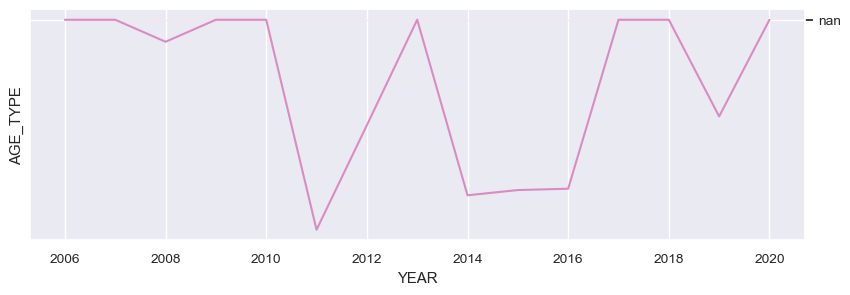


MARGAREE
--------------------------------------------------
Data Info: AGE_TYPE 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 11548
number of blanks = 0
number of null =  32924

--------------------------------------------------
Histogram: AGE_TYPE
CATEGORICAL


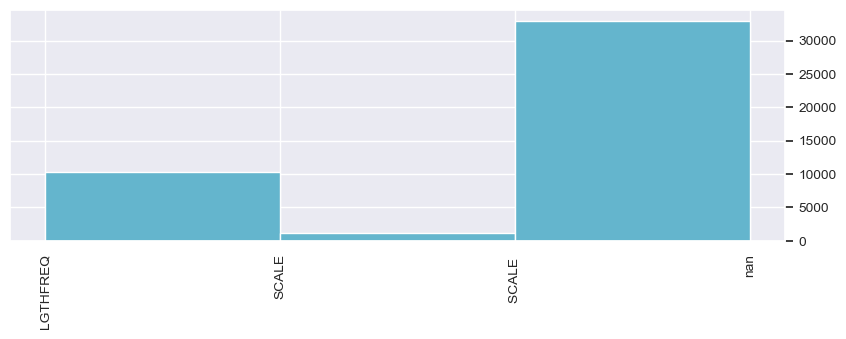


------------------------------------------------
Time Series:AGE_TYPE
CATEGORICAL


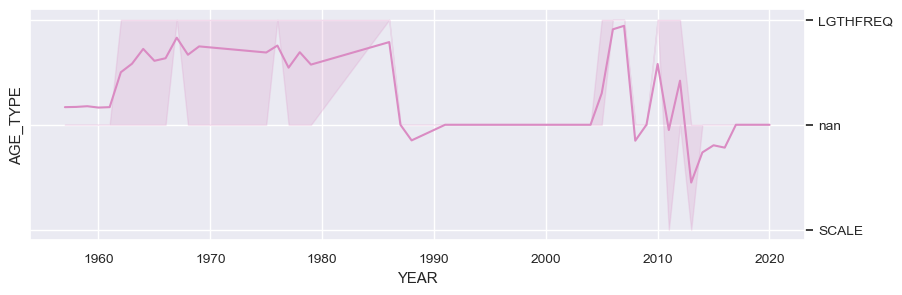


GNS
--------------------------------------------------
Data Info: FISH_STATUS 

UNIQUE numbers, strings, blanks, null = (0, 6, 0, 1)
number of numeric = 0
number of strings = 12859
number of blanks = 0
number of null =  36

--------------------------------------------------
Histogram: FISH_STATUS
CATEGORICAL


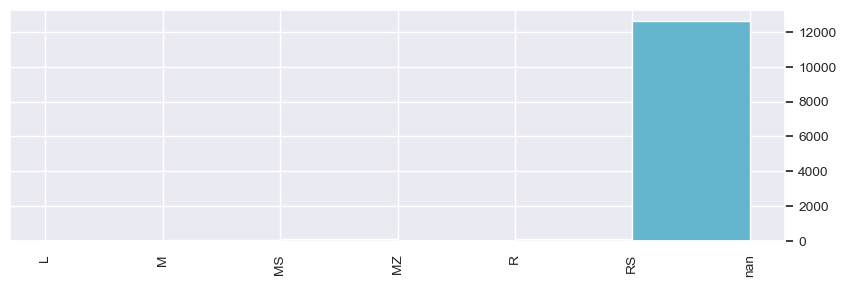


------------------------------------------------
Time Series:FISH_STATUS
CATEGORICAL


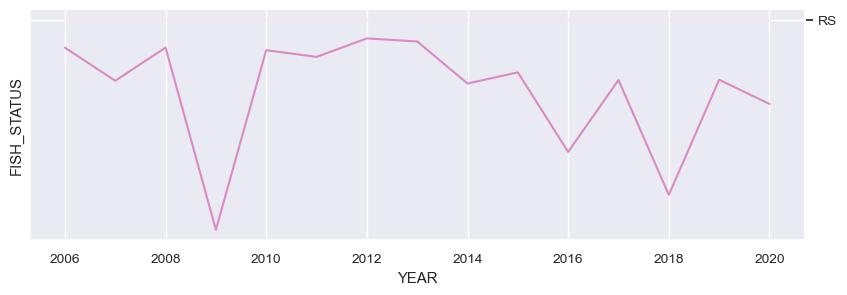


MARGAREE
--------------------------------------------------
Data Info: FISH_STATUS 

UNIQUE numbers, strings, blanks, null = (0, 7, 0, 1)
number of numeric = 0
number of strings = 41124
number of blanks = 0
number of null =  3348

--------------------------------------------------
Histogram: FISH_STATUS
CATEGORICAL


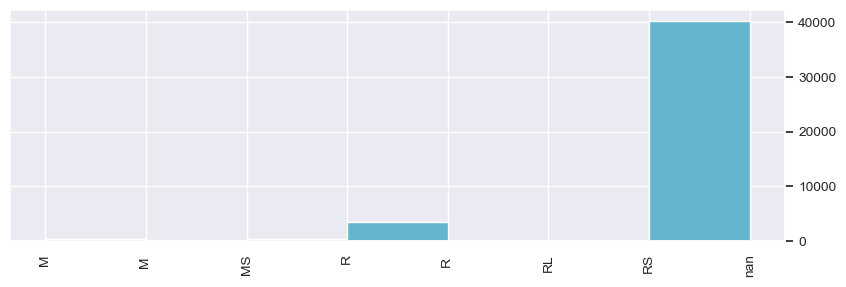


------------------------------------------------
Time Series:FISH_STATUS
CATEGORICAL


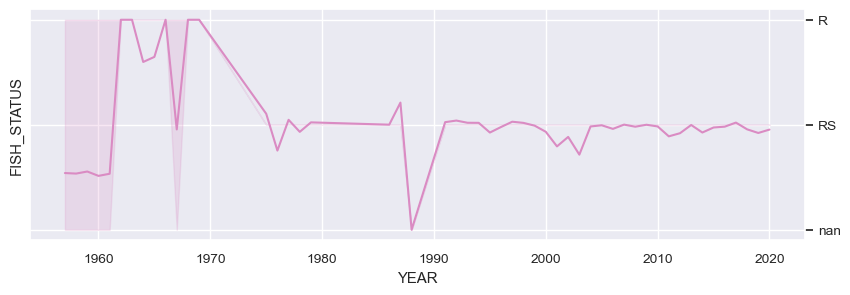


GNS
--------------------------------------------------
Data Info: FISH_SIZE 

UNIQUE numbers, strings, blanks, null = (0, 4, 0, 1)
number of numeric = 0
number of strings = 10627
number of blanks = 0
number of null =  2268

--------------------------------------------------
Histogram: FISH_SIZE
CATEGORICAL


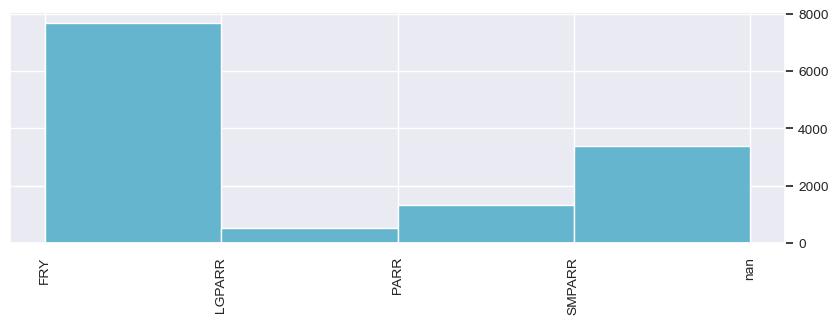


------------------------------------------------
Time Series:FISH_SIZE
CATEGORICAL


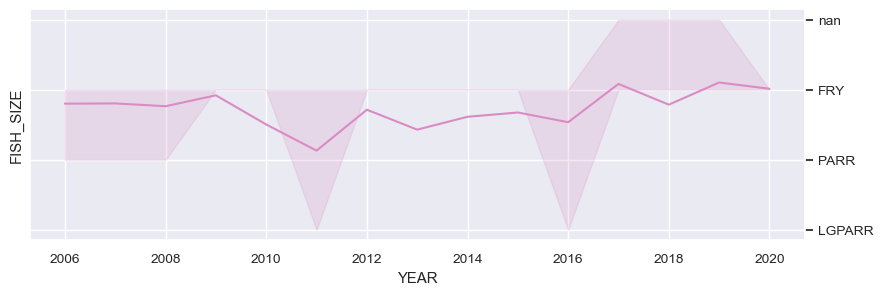


MARGAREE
--------------------------------------------------
Data Info: FISH_SIZE 

UNIQUE numbers, strings, blanks, null = (0, 6, 0, 1)
number of numeric = 0
number of strings = 36719
number of blanks = 0
number of null =  7753

--------------------------------------------------
Histogram: FISH_SIZE
CATEGORICAL


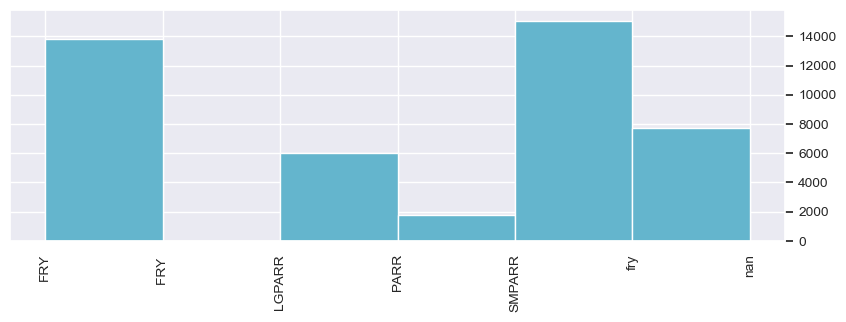


------------------------------------------------
Time Series:FISH_SIZE
CATEGORICAL


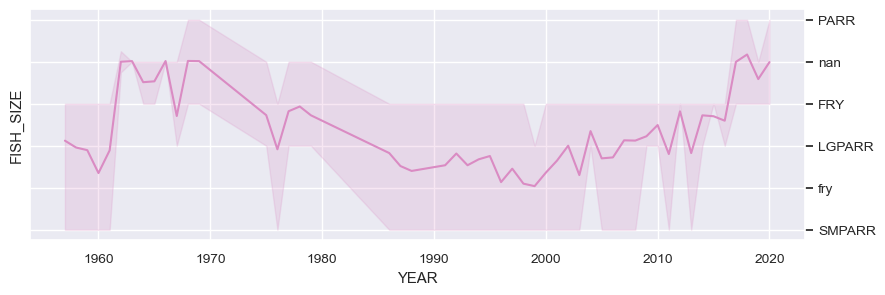


GNS
--------------------------------------------------
Data Info: RIVER_NAME 

UNIQUE numbers, strings, blanks, null = (0, 16, 0, 1)
number of numeric = 0
number of strings = 12859
number of blanks = 0
number of null =  36

--------------------------------------------------
Histogram: RIVER_NAME
CATEGORICAL


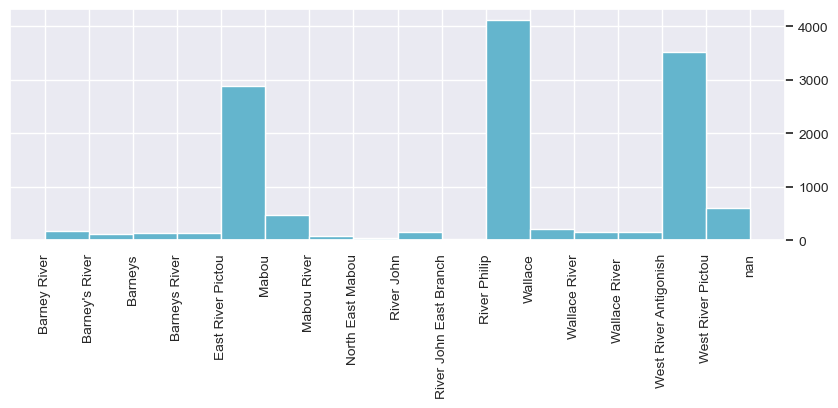


------------------------------------------------
Time Series:RIVER_NAME
CATEGORICAL


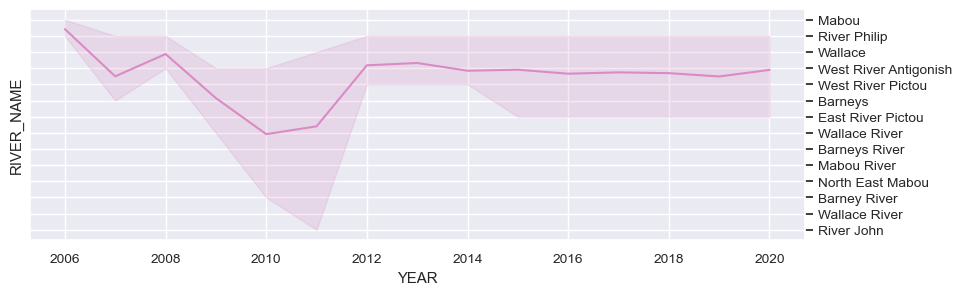


MARGAREE
--------------------------------------------------
COLUMN MISSING: RIVER_NAME

GNS
--------------------------------------------------
Data Info: MATURITY 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 23
number of blanks = 0
number of null =  12872

--------------------------------------------------
Histogram: MATURITY
CATEGORICAL


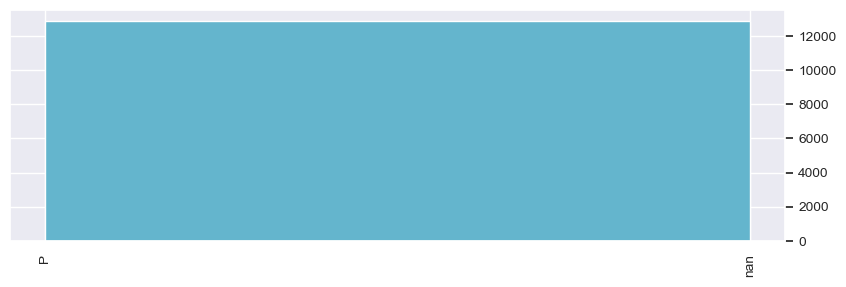


------------------------------------------------
Time Series:MATURITY
CATEGORICAL


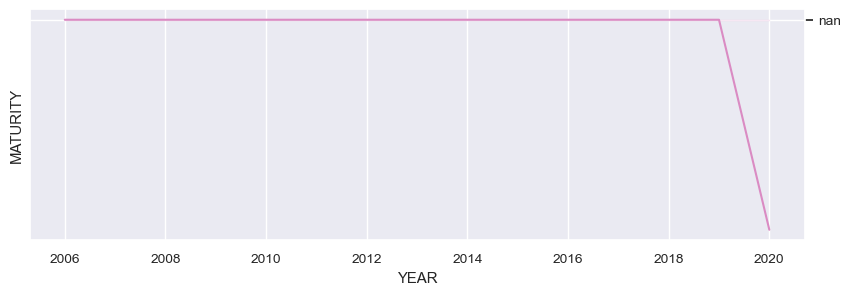


MARGAREE
--------------------------------------------------
Data Info: MATURITY 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 36
number of blanks = 0
number of null =  44436

--------------------------------------------------
Histogram: MATURITY
CATEGORICAL


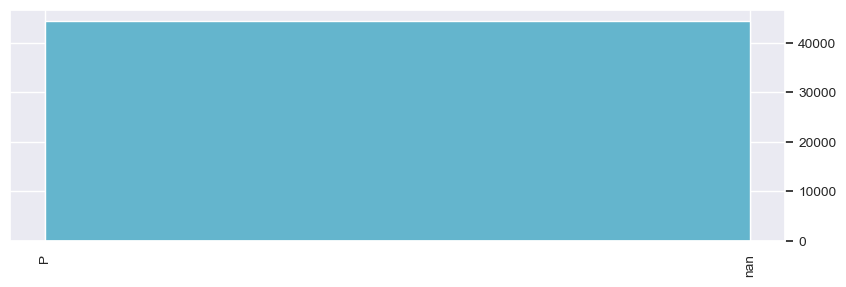


------------------------------------------------
Time Series:MATURITY
CATEGORICAL


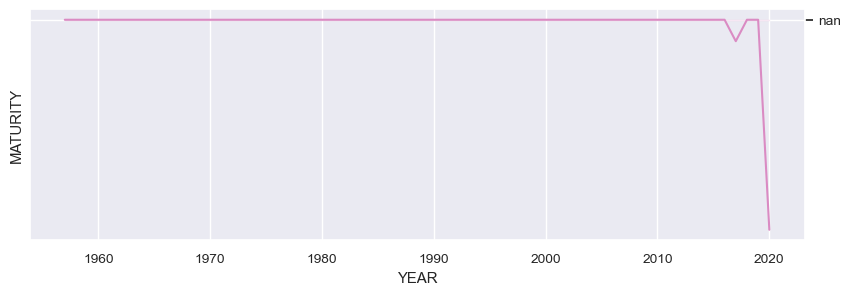

In [32]:
dont_plot_these_columns = ['ID', 'YEAR', 'WEIGHT', 'SCALE_ID_NUMBER', 'SITE', 'SPECIES_ITIS_CODE', 'TOTAL_LENGTH', 'COMMENTS', 'FORK_LENGTH_INTERVAL_WIDTH']
plot_these_columns = [x for x in set(list(df_gns.columns) + list(df_mar.columns)) if x not in dont_plot_these_columns]
missing_from_gns = [x for x in df_mar.columns if x not in df_gns.columns]
missing_from_mar = [x for x in df_gns.columns if x not in df_mar.columns]

for col in dont_plot_these_columns:
    print('\nGNS')
    if col in missing_from_gns:
        print('--------------------------------------------------\nCOLUMN MISSING:', col)
    else:
        print_data_info(df_gns, col)
    print('\nMARGAREE')
    if col in missing_from_mar:
        print('--------------------------------------------------\nCOLUMN MISSING:', col)
    else:
        print_data_info(df_mar, col)
for col in plot_these_columns:
    print('\nGNS')
    if col in missing_from_gns:
        print('--------------------------------------------------\nCOLUMN MISSING:', col)
    else:
        do_EDA_stuff(df_gns, col)
    print('\nMARGAREE')
    if col in missing_from_mar:
        print('--------------------------------------------------\nCOLUMN MISSING:', col)
    else:
        do_EDA_stuff(df_mar, col)

# Import Code Data

In [33]:
# 'Code, species' / 'Code' sheet has field, code, label, descriptions for many features (not just species)

df_gcode = pd.read_excel(r'.\raw_data\GNS Efish_2006-2020_For DM App.xlsx', sheet_name='Code, species')
df_gcode.columns = [x.strip().replace(' ', '_').upper() for x in df_gcode.columns]

df_mcode = pd.read_excel(r'.\raw_data\Margaree Efish_1957-2020_For DM App.xlsx', sheet_name='Code')
df_mcode.columns = [x.strip().replace(' ', '_').upper() for x in df_mcode.columns]

### are they the exact same? (yes)

In [34]:
(df_mcode == df_gcode).all()

VIEW_NAME       True
ALIAS_NAME      True
FIELDNAME       True
CODE_VALUE      True
LABEL           True
DESCRIPTION    False
dtype: bool

In [35]:
# all 'mismatched' entries are actually just Null

df_mcode[~(df_mcode == df_gcode).all(axis=1)].DESCRIPTION.isna().all(), df_gcode[~(df_mcode == df_gcode).all(axis=1)].DESCRIPTION.isna().all()

(True, True)

In [36]:
# from now on, just use mcode
df_code = df_mcode

### unique values

In [37]:
print_unique(df_code)


VIEW_NAME
['VU_SEMIR_BIOLOGICAL', 'VU_SEMIR_RIVER', 'VU_SEMIR_SITE', 'VU_SEMIR_SITE_MEASUREMENT', 'VU_SEMIR_SPECIES']

ALIAS_NAME
['Fish Data', 'River', 'Site Data', 'Site Measurement Data', 'Species']

FIELDNAME
['AGE_TYPE', 'AIKENHEAD_LEGROW_CODE', 'APRONSEINE_TYPE', 'DEPTH_LAYOUT_TYPE', 'ELECTROFISHER_TYPE', 'FILE_TYPE', 'FISH_SIZE', 'FISH_STATUS', 'MARITIME_RIVER_CODE', 'MATURITY', 'MESH_SIZE', 'OLD_MARITIME_RIVER_CODE', 'ORIGIN', 'RIVER_PROVINCE', 'SEX', 'SPECIES_LIFE_STAGE', 'WEATHER']

CODE_VALUE
number of unique values: 374

LABEL
number of unique values: 452

DESCRIPTION
number of unique values: 433


### are there any duplicate fieldname/code combos? (yes)
* substatial data cleaning could be benefitial

In [38]:
df_code.groupby(['FIELDNAME', 'CODE_VALUE']).count().describe()

,VIEW_NAME,ALIAS_NAME,LABEL,DESCRIPTION
count,470.0,470.0,470.0,470.0
mean,1.6,1.6,1.6,1.5
std,0.5,0.5,0.5,0.6
min,1.0,1.0,1.0,0.0
25%,1.0,1.0,1.0,1.0
50%,2.0,2.0,2.0,2.0
75%,2.0,2.0,2.0,2.0
max,2.0,2.0,2.0,2.0


In [39]:
# entries with duplicated fieldname, code_value 
duplicated_codes = list(
    df_code[df_code.duplicated(subset=['FIELDNAME', 'CODE_VALUE'], keep=False)]
    .groupby('CODE_VALUE')
    .count()
    .reset_index()
    .CODE_VALUE
    .unique()
)

In [40]:
# what are the differences in different columns where CODE_VALUE is duplicated?

df_duplicated = df_code[df_code.CODE_VALUE.isin(duplicated_codes)].sort_values('CODE_VALUE')

for col in [x for x in df_duplicated if x != 'CODE_VALUE']:
    print()
    print(col)
    temp = df_duplicated[df_duplicated.ne(df_duplicated.shift())][col].value_counts()
    print(temp[temp>1].sort_index())


VIEW_NAME
VU_SEMIR_RIVER    193
VU_SEMIR_SITE     193
Name: VIEW_NAME, dtype: int64

ALIAS_NAME
River        193
Site Data    193
Name: ALIAS_NAME, dtype: int64

FIELDNAME
MARITIME_RIVER_CODE        99
OLD_MARITIME_RIVER_CODE    98
Name: FIELDNAME, dtype: int64

LABEL
1113000 - MIRAMICHI RIVER                                      2
1113004 - SOUTHWEST MIRAMICHI, Southwest Miramichi River       2
1113024 - BETT'S MILL BK., BETT'S MILL BROOK                   2
1113024 - BETTS MILL BK                                        2
1113045 - Rocky Brook                                          2
1113048 - BIG HOLE BK                                          2
1113060 - Bartholomew River                                    2
1113060 - UNKNOWN                                              2
1113063 - DUNGARVON                                            2
1113063 - Dungarvon River                                      2
1113064 - Renous River                                         2
1113066 - NORTH

In [41]:
# example
df_duplicated[df_duplicated.CODE_VALUE=='1113073']

,VIEW_NAME,ALIAS_NAME,FIELDNAME,CODE_VALUE,LABEL,DESCRIPTION
339,VU_SEMIR_RIVER,River,OLD_MARITIME_RIVER_CODE,1113073,1113073 - BIG SEVOGLE RIVER,1113073 - BIG SEVOGLE RIVER
174,VU_SEMIR_RIVER,River,MARITIME_RIVER_CODE,1113073,1113073 - BIG SEVOGLE,1113073 - BIG SEVOGLE
611,VU_SEMIR_SITE,Site Data,OLD_MARITIME_RIVER_CODE,1113073,1113073 - BIG SEVOGLE RIVER,1113073 - BIG SEVOGLE RIVER
446,VU_SEMIR_SITE,Site Data,MARITIME_RIVER_CODE,1113073,1113073 - BIG SEVOGLE,1113073 - BIG SEVOGLE


# CODE visualisations and EDA

--------------------------------------------------
Data Info: CODE_VALUE 

UNIQUE numbers, strings, blanks, null = (342, 32, 0, 0)
number of numeric = 703
number of strings = 39
number of blanks = 0
number of null =  0
--------------------------------------------------
Data Info: LABEL 

UNIQUE numbers, strings, blanks, null = (44, 408, 0, 0)
number of numeric = 44
number of strings = 698
number of blanks = 0
number of null =  0
--------------------------------------------------
Data Info: DESCRIPTION 

UNIQUE numbers, strings, blanks, null = (44, 389, 0, 1)
number of numeric = 44
number of strings = 674
number of blanks = 0
number of null =  24
--------------------------------------------------
Data Info: VIEW_NAME 

UNIQUE numbers, strings, blanks, null = (0, 5, 0, 0)
number of numeric = 0
number of strings = 742
number of blanks = 0
number of null =  0

--------------------------------------------------
Histogram: VIEW_NAME
CATEGORICAL


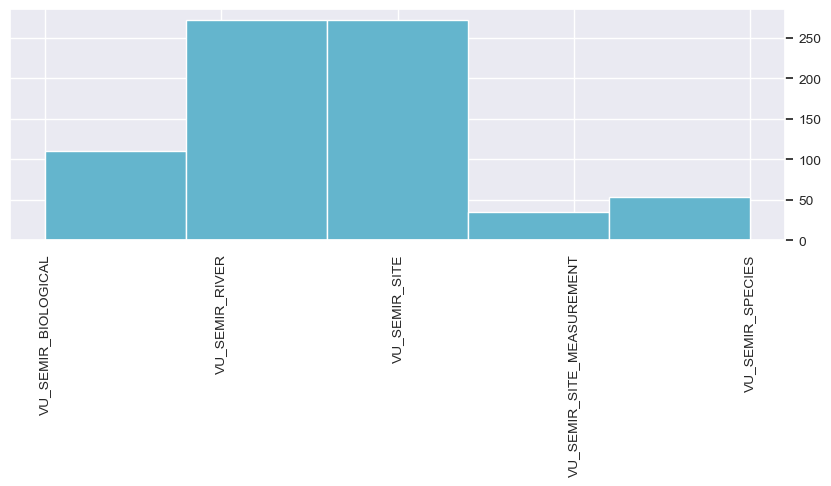

--------------------------------------------------
Data Info: ALIAS_NAME 

UNIQUE numbers, strings, blanks, null = (0, 5, 0, 0)
number of numeric = 0
number of strings = 742
number of blanks = 0
number of null =  0

--------------------------------------------------
Histogram: ALIAS_NAME
CATEGORICAL


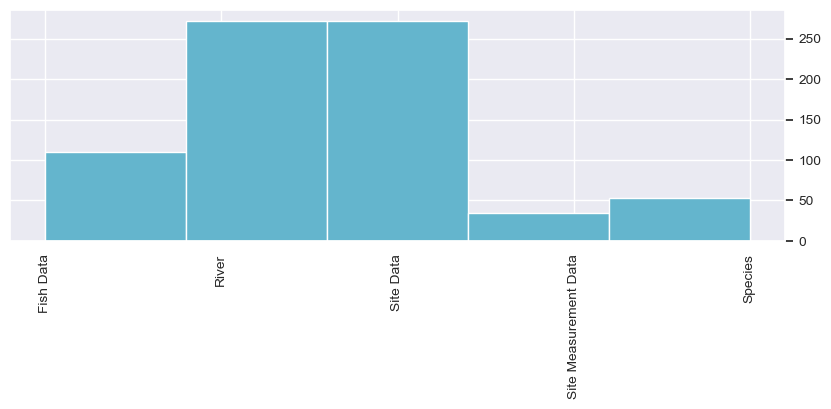

--------------------------------------------------
Data Info: FIELDNAME 

UNIQUE numbers, strings, blanks, null = (0, 17, 0, 0)
number of numeric = 0
number of strings = 742
number of blanks = 0
number of null =  0

--------------------------------------------------
Histogram: FIELDNAME
CATEGORICAL


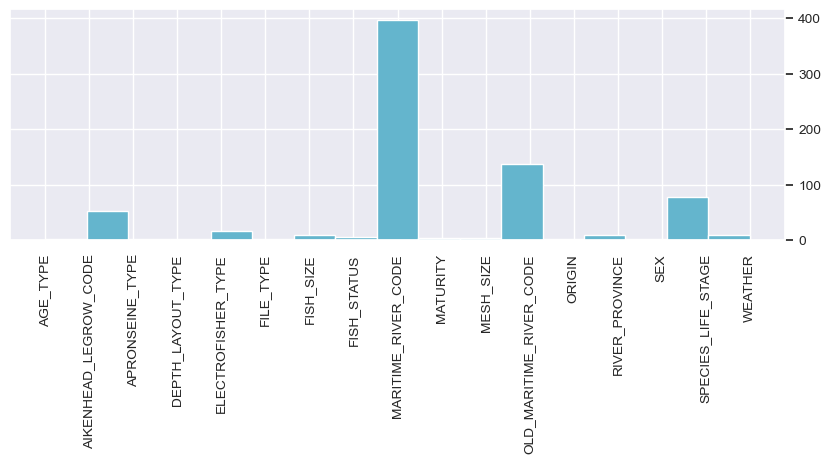

In [42]:
dont_plot_these_columns = ['CODE_VALUE', 'LABEL', 'DESCRIPTION']
plot_these_columns = [x for x in list(df_code.columns) if x not in dont_plot_these_columns]

for col in dont_plot_these_columns:
    print_data_info(df_code, col)
for col in plot_these_columns:
    print_data_info(df_code, col)
    print_hist(df_code, col)

### Null values

In [43]:
df_code.isnull().sum()

VIEW_NAME       0
ALIAS_NAME      0
FIELDNAME       0
CODE_VALUE      0
LABEL           0
DESCRIPTION    24
dtype: int64

In [44]:
df_code[df_code.DESCRIPTION.isnull()]

,VIEW_NAME,ALIAS_NAME,FIELDNAME,CODE_VALUE,LABEL,DESCRIPTION
100,VU_SEMIR_BIOLOGICAL,Fish Data,AGE_TYPE,LGTHFREQ,BIOLOGICAL_AGING_METHOD1_LF,NaN
101,VU_SEMIR_BIOLOGICAL,Fish Data,AGE_TYPE,SCALE,BIOLOGICAL_AGING_METHOD1_SCL,NaN
377,VU_SEMIR_RIVER,River,RIVER_PROVINCE,NB,RIVER_PROVINCE_NB,NaN
378,VU_SEMIR_RIVER,River,RIVER_PROVINCE,NFLD,RIVER_PROVINCE_NFLD,NaN
379,VU_SEMIR_RIVER,River,RIVER_PROVINCE,NS,RIVER_PROVINCE_NS,NaN
380,VU_SEMIR_RIVER,River,RIVER_PROVINCE,PEI,RIVER_PROVINCE_PEI,NaN
381,VU_SEMIR_RIVER,River,RIVER_PROVINCE,QC,RIVER_PROVINCE_QC,NaN
649,VU_SEMIR_SITE,Site Data,RIVER_PROVINCE,NB,RIVER_PROVINCE_NB,NaN
650,VU_SEMIR_SITE,Site Data,RIVER_PROVINCE,NFLD,RIVER_PROVINCE_NFLD,NaN
651,VU_SEMIR_SITE,Site Data,RIVER_PROVINCE,NS,RIVER_PROVINCE_NS,NaN


### Value Counts

In [45]:
for col in df_code.columns:
    print()
    print(col)
    if df_code[col].nunique()>10:
        display(df_code[col].value_counts().head(10))
    else:
        display(df_code[col].value_counts())


VIEW_NAME


VU_SEMIR_RIVER               272
VU_SEMIR_SITE                272
VU_SEMIR_BIOLOGICAL          110
VU_SEMIR_SPECIES              53
VU_SEMIR_SITE_MEASUREMENT     35
Name: VIEW_NAME, dtype: int64


ALIAS_NAME


River                    272
Site Data                272
Fish Data                110
Species                   53
Site Measurement Data     35
Name: ALIAS_NAME, dtype: int64


FIELDNAME


MARITIME_RIVER_CODE        396
OLD_MARITIME_RIVER_CODE    138
SPECIES_LIFE_STAGE          79
AIKENHEAD_LEGROW_CODE       53
ELECTROFISHER_TYPE          17
FISH_SIZE                   10
RIVER_PROVINCE              10
WEATHER                      9
FISH_STATUS                  6
MATURITY                     5
Name: FIELDNAME, dtype: int64


CODE_VALUE


2          6
1          6
847004     4
1113088    4
1102000    4
1192019    4
1192020    4
1103000    4
1104000    4
1107000    4
Name: CODE_VALUE, dtype: int64


LABEL


1113001 - Black Brook         4
1113068 - SUTHERLAND BROOK    4
1103000 - Eel River           4
1102000 - Portage River       4
1115000 - OYSTER RIVER        4
1113057 - MORSE BROOK         4
1109000 - BLACK RIVER         4
1114000 - BARTIBOG RIVER      4
1111000 - NAPAN RIVER         4
1104000 - French River        4
Name: LABEL, dtype: int64


DESCRIPTION


1113016 - Black Brook          4
1113005 - Barnaby River        4
1113007 - Grey Rapids Brook    4
1113008 - Becket Brook         4
1113013 - McKenzie Brook       4
1113001 - Black Brook          4
1111000 - NAPAN RIVER          4
1109000 - BLACK RIVER          4
1104000 - French River         4
1103000 - Eel River            4
Name: DESCRIPTION, dtype: int64

# Site Measurement Data

In [46]:
df_gsite = pd.read_excel(r'.\raw_data\GNS Efish_2006-2020_For DM App.xlsx', sheet_name='Site Measurement Data')
df_gsite.columns = [x.strip().replace(' ', '_').upper() for x in df_gsite.columns]

df_msite = pd.read_excel(r'.\raw_data\Margaree Efish_1957-2020_For DM App.xlsx', sheet_name='Site Measurement Data')
df_msite.columns = [x.strip().replace(' ', '_').upper() for x in df_msite.columns]

In [56]:
df_gsite.drop('SITE_EVENT_DATE', axis=1).describe(percentiles=[], include='all').drop(['top', 'freq']).T.fillna('')  #.sort_values(['unique', 'count'], ascending=[True, False])

,count,unique,mean,std,min,50%,max
ID,244.0,,122.5,70.6,1.0,122.5,244.0
SURVEY,244.0,,2013.8,4.1,2006.0,2014.0,2020.0
SITE,242.0,32.0,,,,,
RIVER_NAME,244.0,15,,,,,
TOS1,211.0,21.0,,,,,
TOS2,211.0,21.0,,,,,
TOS3,211.0,7.0,,,,,
TOS4,211.0,6.0,,,,,
LENGTH_LEFT_BANK,238.0,,15.2,4.9,3.5,14.8,33.6
LENGTH_RIGHT_BANK,238.0,,15.8,12.6,3.4,14.8,194.0


In [48]:
df_msite.drop('SITE_EVENT_DATE', axis=1).describe(percentiles=[], include='all').drop(['top', 'freq']).T.fillna('')

,count,unique,mean,std,min,50%,max
ID,617.0,,309.0,178.3,1.0,309.0,617.0
SURVEY,617.0,,1989.5,19.9,1957.0,1992.0,2020.0
SITE,617.0,105.0,,,,,
CGNDB,223.0,16,,,,,
TOS1,183.0,,69.3,35.1,0.0,80.0,100.0
TOS2,184.0,,25.7,33.7,0.0,10.0,100.0
TOS3,184.0,,5.0,17.9,0.0,0.0,100.0
TOS4,184.0,,0.2,1.6,0.0,0.0,20.0
LENGTH_LEFT_BANK,579.0,,21.7,10.9,5.3,18.4,63.1
LENGTH_RIGHT_BANK,579.0,,21.8,11.1,5.3,18.7,63.2


### differences in columns

In [49]:
# not in Margaree data
[x for x in df_gsite.columns if x not in df_msite.columns]

['RIVER_NAME']

In [50]:
# not in GNS data
[x for x in df_msite.columns if x not in df_msite.columns]

[]

### yearly change

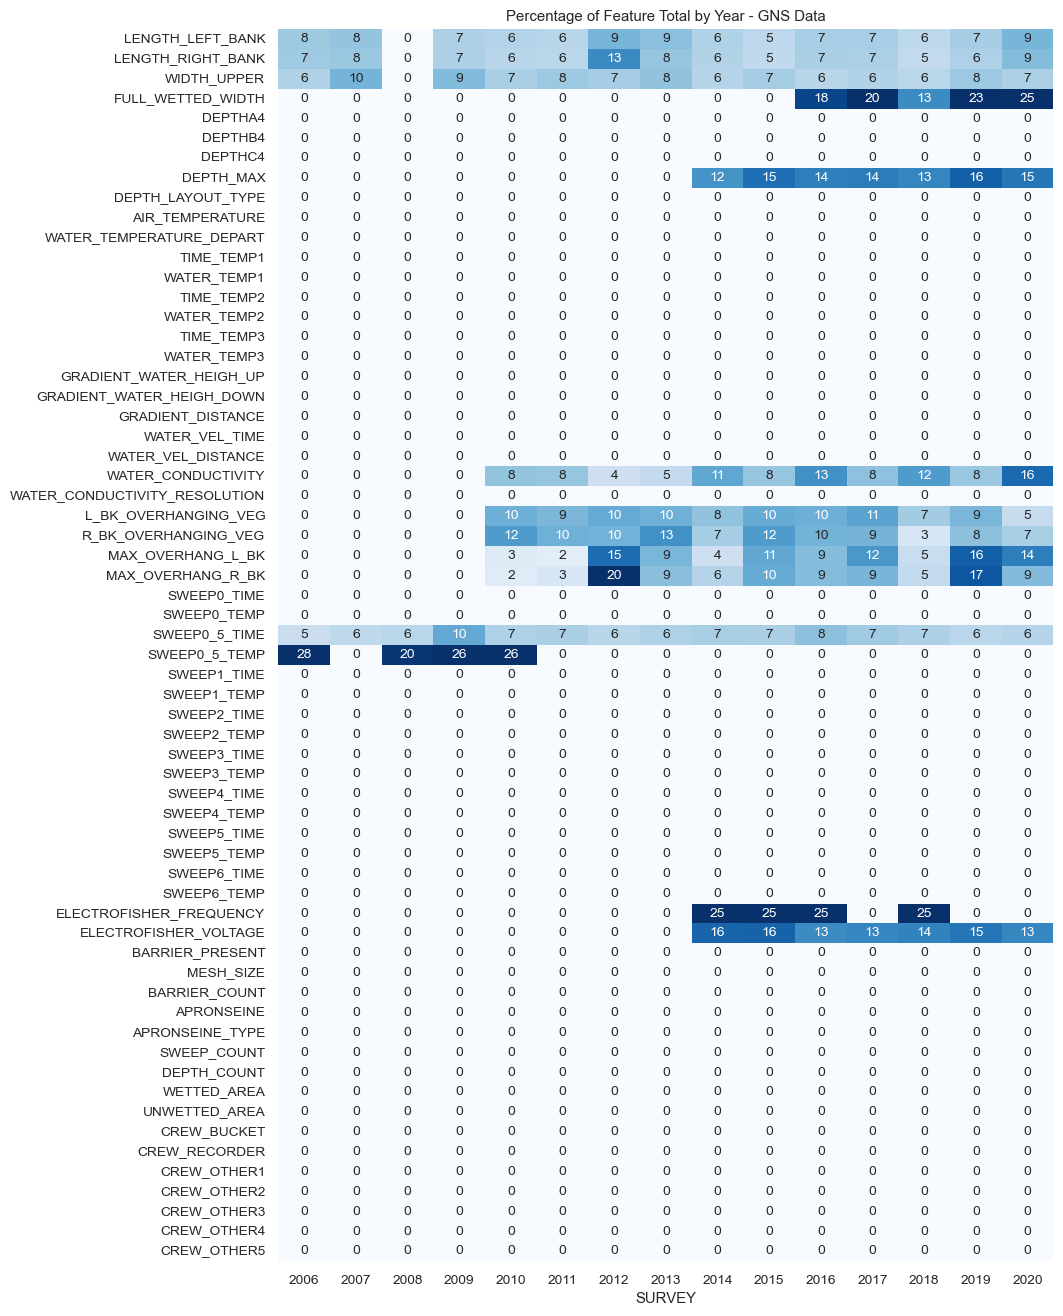

In [51]:
plt.figure(figsize=(10,16))
sns.heatmap(
    (100 * df_gsite.groupby('SURVEY').mean() / df_gsite.groupby('SURVEY').mean().sum()).fillna(0).drop('ID', axis=1).T, 
    cmap='Blues',
    cbar=False, 
    annot=True, 
    fmt='.0f', 
    annot_kws={"fontsize":10},
    vmax=20
)
plt.title('Percentage of Feature Total by Year - GNS Data')
plt.show()

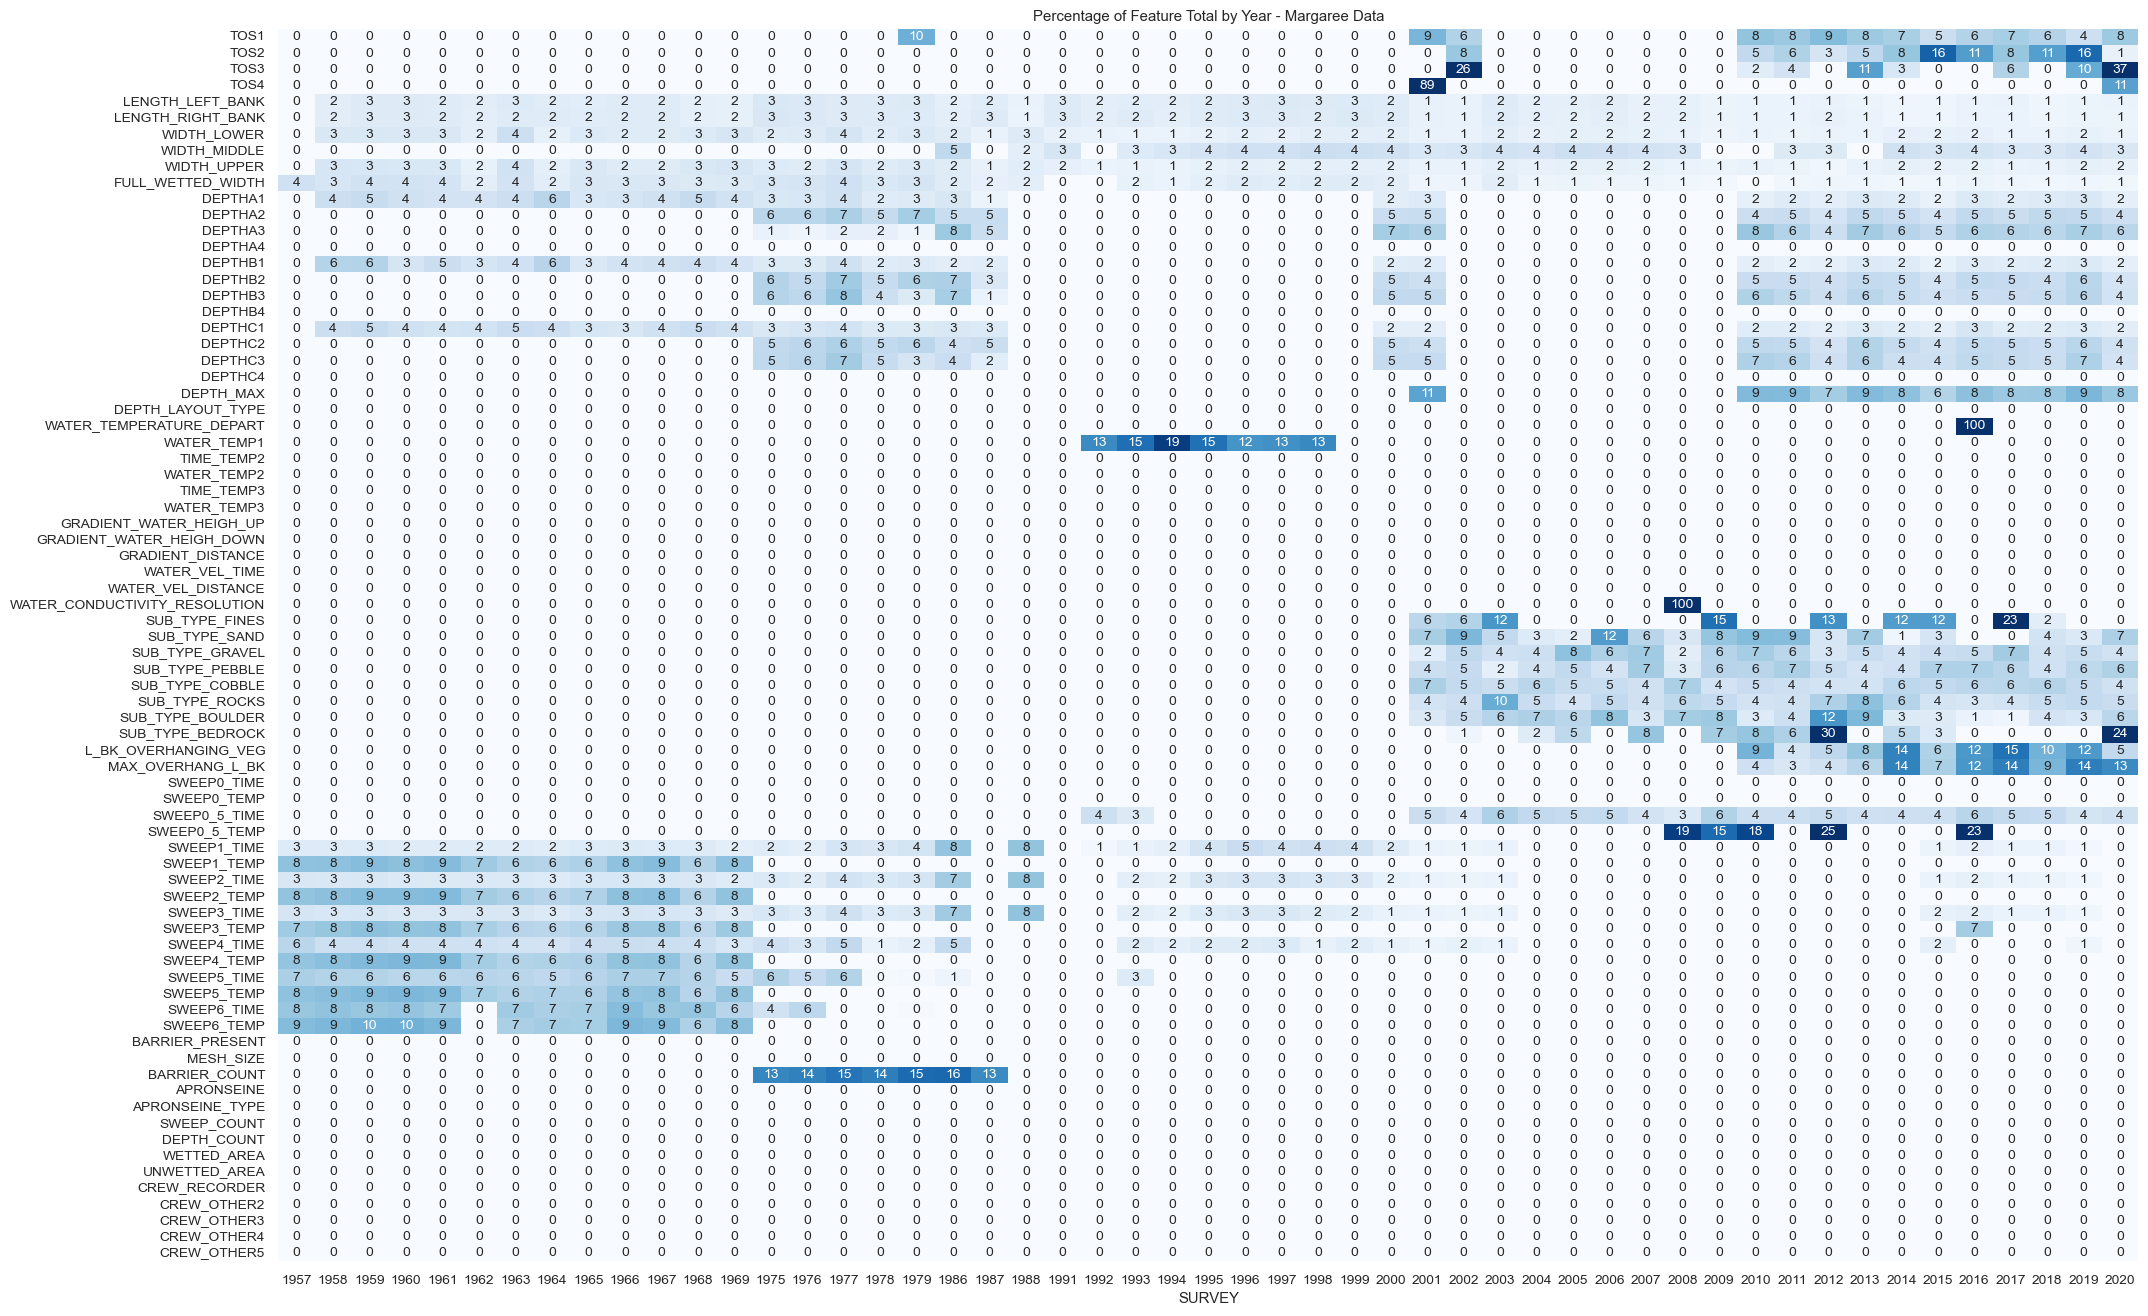

In [52]:
plt.figure(figsize=(24,16))
sns.heatmap(
    (100 * df_msite.groupby('SURVEY').mean() / df_msite.groupby('SURVEY').mean().sum()).fillna(0).drop('ID', axis=1).T, 
    cmap='Blues',
    cbar=False, 
    annot=True, 
    fmt='.0f', 
    annot_kws={"fontsize":10},
    vmax=20
)
plt.title('Percentage of Feature Total by Year - Margaree Data')
plt.show()

### unique values

In [57]:
print_unique(df_gsite)


ID
number of unique values: 244

SURVEY
[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

SITE
['.', 1, 10, '1A', 2, 3, '3A ', '3B', 4, '4(1 of 2)', '4(2of2)', '4B', 5, 6, '6B', 7, '7B', '7b', 8, '8A', '8B', '8b', 9, 98, 99, 997, 998, 999, '9A', 'P4', 'SP 1', 'SP1', nan]

RIVER_NAME
['Barney', "Barney's River", 'Barneys', 'Barneys River', 'East River Pictou', 'Mabou', 'NE Mabou', 'River John', 'River John East Branch', 'River Philip', 'Wallace', 'Wallace River', 'West River Antigonish', 'West River Pictou', 'West river antigonish']

SITE_EVENT_DATE
[numpy.datetime64('2006-08-17T00:00:00.000000000'), numpy.datetime64('2006-08-18T00:00:00.000000000'), numpy.datetime64('2006-09-26T00:00:00.000000000'), numpy.datetime64('2007-09-12T00:00:00.000000000'), numpy.datetime64('2007-09-20T00:00:00.000000000'), numpy.datetime64('2007-09-21T00:00:00.000000000'), numpy.datetime64('2008-08-27T00:00:00.000000000'), numpy.datetime64('2008-10-09T00:00:00.000000

In [59]:
print_unique(df_msite)


ID
number of unique values: 617

SURVEY
[1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1975, 1976, 1977, 1978, 1979, 1986, 1987, 1988, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

SITE
number of unique values: 105

CGNDB
[' ', 'CACZB', 'CAFTL', 'CAMNO', 'CANHO', 'CARKU', 'CATHP', 'CAWKZ', 'CAXMI', 'CBBOH', 'CBBOII', 'CBBWL', 'CBJVR', 'CBKNG', 'CBPVG', 'CBRCF', nan]

SITE_EVENT_DATE
number of unique values: 434

TOS1
[0.0, 10.0, 100.0, 20.0, 25.0, 30.0, 35.0, 40.0, 5.0, 50.0, 60.0, 65.0, 70.0, 75.0, 80.0, 90.0, 95.0, nan]

TOS2
[0.0, 10.0, 100.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 5.0, 50.0, 60.0, 70.0, 75.0, 80.0, 90.0, 95.0, nan]

TOS3
[0.0, 10.0, 100.0, 20.0, 25.0, 30.0, 40.0, 5.0, 55.0, 70.0, nan]

TOS4
[0.0, 10.0, 20.0, nan]

LENGTH_LEFT_BANK
number of unique values: 285

LENGTH_RIGHT_BANK
number of unique values: 

### Null Features

In [82]:
null_gsite_columns = list(df_gsite.loc[:, df_gsite.isnull().all()].columns)
null_msite_columns = list(df_msite.loc[:, df_msite.isnull().all()].columns)

In [95]:
# only empty columns
pd.merge(
    pd.DataFrame([[x, 'column empty'] for x in null_gsite_columns], columns=['feature', 'gns_site']),
    pd.DataFrame([[x, 'column empty'] for x in null_msite_columns], columns=['feature', 'mar_site']),
    on='feature',
    how='outer'
).fillna('')

,feature,gns_site,mar_site
0,DEPTHA4,column empty,column empty
1,DEPTHB4,column empty,column empty
2,DEPTHC4,column empty,column empty
3,DEPTH_LAYOUT_TYPE,column empty,column empty
4,AIR_TEMPERATURE,column empty,
5,WATER_TEMPERATURE_DEPART,column empty,
6,TIME_TEMP1,column empty,
7,WATER_TEMP1,column empty,
8,TIME_TEMP2,column empty,column empty
9,WATER_TEMP2,column empty,column empty


In [98]:
# including all columns
pd.DataFrame([[x] for x in df_msite.columns], columns=['feature']).merge(
    pd.merge(
        pd.DataFrame([[x, 'column empty'] for x in null_gsite_columns], columns=['feature', 'gns_site']),
        pd.DataFrame([[x, 'column empty'] for x in null_msite_columns], columns=['feature', 'mar_site']),
        on='feature',
        how='outer'
    ),
    on='feature',
    how='outer'
).fillna('')

,feature,gns_site,mar_site
0,ID,,
1,SURVEY,,
2,SITE,,
3,CGNDB,,
4,SITE_EVENT_DATE,,
5,TOS1,,
6,TOS2,,
7,TOS3,,
8,TOS4,,
9,LENGTH_LEFT_BANK,,
